# Milestone 3 : Final project and the datastory 🍻

<hr style="clear:both">
This notebook was made for the ADA course at EPFL (CS-401). 

Group : BeerADAventure46

**Authors:** \
[Agatha Hunter](https://people.epfl.ch/agatha.hunter)\
[Anne-Valérie Preto](https://people.epfl.ch/anne-valerie.preto)\
[Tristan Carruzzo](https://people.epfl.ch/tristan.carruzzo)\
[Thamin Maurer](https://people.epfl.ch/thamin.maurer)\
[Victor Dubien](https://people.epfl.ch/victor.dubien)


**Supervisor:**\
[Beatriz Borges](https://people.epfl.ch/beatriz.borges)
<hr style="clear:both">

<blockquote>

## Project 📌

**Influence of the serving style on the tasting profile**:

Goal of the project: Use the textual reviews to find for each beer how it was served (either bottle, can or draft) and find how it influences the tasting profile.

Different serving styles may be adopted in different regions or for different types of beer.  The influence of the serving style could influence not only the appearance, but also the aroma, the palate or the taste.
</blockquote>

In [1]:
### Import libraries
from utils import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 40)

## Table of Contents 📚

1. [Datasets](#1-datasets)  
    1.1. [Loading the datasets](#1_1-loading-the-datasets)  
    1.2. [Initial Datasets Analysis](#1_2-initial-datasets-analysis)  
    1.3. [Merging the datasets](#1_3-merging-the-datasets)  

2. [Data Enrichment](#2-data-enrichment)  
    2.1. [Serving Style](#2_1-serving-style)  
    2.2. [Sentiment Analysis](#2_2-sentiment-analysis)  
    2.3. [Metrics Update](#2_3-metrics-update)  
    2.4. [Geographical Grouping](#2_4-geographical-grouping)  
    2.5. [Beer Style Grouping](#2_5-beer-style-grouping)

3. [Verifying the Dataset Representation](#3-verifying-the-dataset-representation)  

4. [Visualizations](#4-Visualizations)  
    4.1 [Temporal Analysis](#4_1-temporal-analysis)  
    4.2 [Geographical Analysis](#4_2-geographical-analysis)  
    4.3 [Beer Style Analysis](#4_3-beer-style-analysis)  
    
5. [Statistical Analysis](#5-statistical-analysis)  
    5.1 [Does the serving style influence the rating?](#5_1-does-the-serving-style-influence-the-rating)  
    5.2 [Comparison of the ratings for a subset of beers](#5_2-comparison-of-the-ratings-for-a-subset-of-beers)  
    5.3 [Is the serving style dependant on the beer group?](#5_3-is-the-serving-style-dependant-on-the-beer-group)  
    5.4 [For each beer group, is the rating dependant on the serving style?](#5_4-for-each-beer-group-is-the-rating-dependant-on-the-serving-style)  

## 1. Datasets 📂 <a id='1-datasets'></a>

> This part consists in loading the datasets, analyzing them and merging them.

### 1.1. Loading the datasets 📥 <a id='1_1-loading-the-datasets'></a> 

In [2]:
reviews = pd.read_csv(dataset_path + 'reviews.csv')
beers = pd.read_csv(dataset_path + 'beers.csv')
breweries = pd.read_csv(dataset_path + 'breweries.csv')
users = pd.read_csv(dataset_path + 'users.csv')

### 1.2 Initial Datasets Analysis 🔎 <a id='1_2-initial-datasets-analysis'></a>

#### 1.2.1 Beers dataset 🍺

In [3]:
display(beers.sample(3))
print('Shape of beers : ', beers.shape)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
138887,177330,Unite,26391,Pikes Peak Brewing Company,American Wild Ale,1,1,4.29,NaN,NaN,6.8,4.290000,NaN,0,NaN
219492,181853,Mound Builder's Brown Ale,597,Marietta Brewing Company,American Brown Ale,2,0,3.05,NaN,NaN,6.1,3.055000,NaN,0,NaN
163921,122954,Goemon's Gold,28693,Outlaw Brewing,Braggot,7,2,3.58,NaN,NaN,6.6,3.481429,NaN,0,NaN


Shape of beers :  (280823, 15)


In [4]:
# print the number of beers id and beer name
print('Number of different beers id:', len(beers.beer_id.unique()))
print('Number of different beers name:', len(beers.beer_name.unique()))

Number of different beers id: 280823
Number of different beers name: 236209


<blockquote>

**Initial comments about the dataset**

-Some beers have the same name! In order to avoid confusion, we will drop the column beer_name (and brewery_name) from the dataset.

-As we will not use the RateBeer dataset, we can also drop the column nbr_matched_valid_ratings and avg_matched_valid_ratings.  

-The column bros_score only reflect the ratings from the two creators of the website, so we can also drop it.  

-ba_score represents the percentage (rounded to the tenth for depth) of raters who gave the beer a 3.75 or higher as long as the beers as at least 10 ratings.

</blockquote>

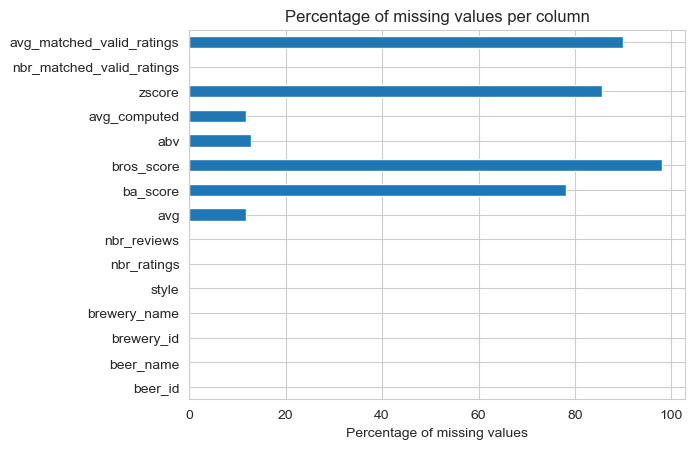

avg                      : 32829 missing values (11.69%)
ba_score                 : 219623 missing values (78.21%)
bros_score               : 275121 missing values (97.97%)
abv                      : 36024 missing values (12.83%)
avg_computed             : 32841 missing values (11.69%)
zscore                   : 240538 missing values (85.65%)
avg_matched_valid_ratings: 252551 missing values (89.93%)


In [5]:
show_missing(beers)

<blockquote>

**More comments about the dataset**

-We see that more than 80% of the beers do not have a z-score value. Since this value takes into account reviews from both websites and is vastly missing, we can drop the column alongside avg_computed. We might compute them manually later if needed.

-80% of the beers have no ba_score value, so we can also drop it and compute it later if needed.

-The other columns with NaN such as avg_matched_valid_ratings, avg_computed or bros_score are not useful in our analysis since we only look at the BeerAdvocate reviews.

-The column abv, which represents the alcohol percentage in a beer, is missing for approximately 12%.

</blockquote>

In [6]:
beers_filtered = beers.drop(columns=['beer_name', 
                            'brewery_name',
                            'bros_score',
                            'ba_score',
                            'nbr_matched_valid_ratings',
                            'avg_matched_valid_ratings',
                            'zscore',
                            'avg_computed']).copy(deep=True)

beers_filtered.rename(columns={'nbr_ratings': 'beer_nbr_ratings',
                               'nbr_reviews': 'beer_nbr_reviews'}, inplace=True)

In [7]:
display(beers_filtered.sample(3))
print('Shape of beers_filtered : ', beers_filtered.shape)

,beer_id,brewery_id,style,beer_nbr_ratings,beer_nbr_reviews,avg,abv
43246,182953,29511,Tripel,2,2,3.38,9.3
60644,107747,9359,German Pilsener,2,1,2.76,4.7
105194,125971,35406,American Brown Ale,6,2,3.83,6.4


Shape of beers_filtered :  (280823, 7)


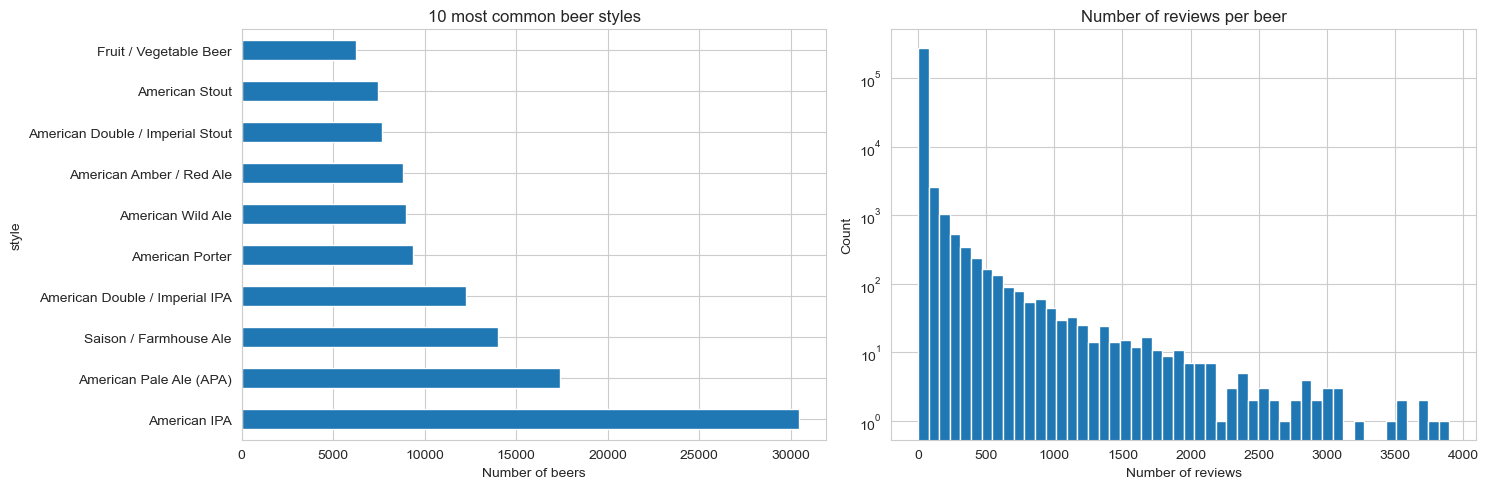

In [8]:
# Representation of the beers dataset
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
beers_filtered['style'].value_counts(normalize=False).head(10).plot(kind='barh', title='10 most common beer styles')
plt.xlabel('Number of beers')
plt.subplot(1, 2, 2)
beers_filtered['beer_nbr_reviews'].hist(bins=50,log=True)
plt.title('Number of reviews per beer')
plt.ylabel('Count')
plt.xlabel('Number of reviews')
plt.tight_layout()
plt.show()

In [9]:
# # Top 10 most common beer styles as barh using plotly.express
# fig = px.bar(beers_filtered['style'].value_counts(normalize=False).head(10),
#              orientation='h',
#              title='10 most common beer styles',
#              labels={'value': 'Number of beers', 'index': 'Beer style'})
# fig.update_layout(showlegend=False)
# fig.update_xaxes(title_text='Number of beers')
# fig.update_yaxes(title_text='Beer style')
# fig.show()

# # exprt the figure as html
# # fig.write_html("figures/top10_beer_style.html")

In [10]:
# # show the number of reviews per beer_id as histogram using plotly.express
# fig = px.histogram(beers_filtered, x="beer_nbr_reviews", log_y=True, nbins=150)
# fig.update_layout(title_text='Number of reviews per beer')
# fig.update_xaxes(title_text='Number of reviews')
# fig.update_yaxes(title_text='Count')
# fig.show()

# # exprt the figure as html
# fig.write_html("figures/beer_nbr_reviews.html")

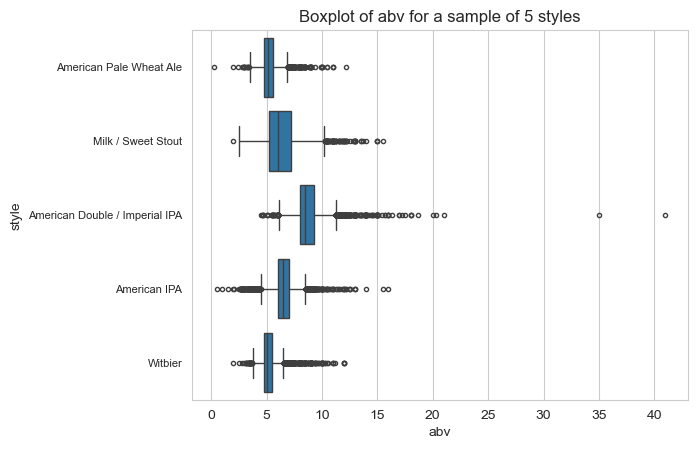

In [11]:
# boxplot of abv for sample of beers 
plt.figure()
sample_styles = beers_filtered['style'].sample(5)  # Select a sample of 5 beer styles
sns.boxplot(y='style', x='abv', data=beers_filtered[beers_filtered['style'].isin(sample_styles)], fliersize=3)
plt.yticks(fontsize=8)
plt.title('Boxplot of abv for a sample of 5 styles')
plt.show()

In [12]:
# group the beers by style and compute the median of abv for each style
median_abv_by_style = beers_filtered.groupby('style')['abv'].median()
# display(median_abv_by_style.sample(3))

# fill the missing abv values with the median of abv for the style of each beer
beers_filtered['abv'] = beers_filtered.apply(lambda x: median_abv_by_style[x['style']] if pd.isna(x['abv']) else x['abv'], axis=1)

In [13]:
beers_filtered.describe()

,beer_id,brewery_id,beer_nbr_ratings,beer_nbr_reviews,avg,abv
count,280823.000000,280823.000000,280823.000000,280823.000000,247994.000000,280823.000000
mean,148556.817141,21335.895860,29.887267,9.221417,3.721034,6.434481
std,84307.593397,15385.715656,231.010063,68.866445,0.476003,1.984850
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,76513.500000,3835.000000,1.000000,0.000000,3.500000,5.000000
50%,148867.000000,24075.000000,2.000000,1.000000,3.780000,6.000000
75%,221817.500000,33960.000000,8.000000,2.000000,4.010000,7.300000
max,293296.000000,49817.000000,16509.000000,3899.000000,5.000000,67.500000


<blockquote>

We are left with a dataset containing 280823 beers. We are only missing some values for avg as some beers do not have any ratings/reviews. They will be removed later when merging with the reviews dataset anyway.

</blockquote>

#### 1.2.2 Breweries dataset 🏭

In [14]:
display(breweries.sample(3))
print('Shape of breweries : ', breweries.shape)

,id,location,name,nbr_beers
4692,6088,Germany,Koppbräu Neumayer,0
5387,24653,Vietnam,GammerBeer,0
8274,24488,"United States, Louisiana",Tin Roof Brewing Company,25


Shape of breweries :  (16758, 4)


In [15]:
# show the missing values
show_missing(breweries)

There are no missing values in this dataset.


<blockquote>

This dataset has no missing values, we will simply rename the columns and drop the brewery name.

</blockquote>

In [16]:
breweries_filtered = breweries.drop(columns=['name']).copy(deep=True)

breweries_filtered.rename(columns={'id':'brewery_id',
                                   'location':'brewery_location',
                                   'nbr_beers':'brewery_nbr_beers'}, inplace=True)

In [17]:
display(breweries_filtered.sample(3))
print('Shape of breweries filtered: ', breweries_filtered.shape)

,brewery_id,brewery_location,brewery_nbr_beers
10846,43441,"United States, Indiana",14
4310,5759,Germany,0
10629,754,"United States, Pennsylvania",33


Shape of breweries filtered:  (16758, 3)


In [18]:
# Some breweries have weird location values, they contain google maps links. All the breweries with a weird location value are in the US.
print('Number of breweries with a weird location value:', len(breweries_filtered[breweries_filtered['brewery_location'].str.contains('<', na=False)]))

# for loc in breweries_filtered[breweries_filtered['brewery_location'].str.contains('<', na=False)]['brewery_location'].unique():
#     print(loc) # print the strange values

Number of breweries with a weird location value: 35


In [19]:
# manually adding the location for those 35 breweries

#obtain the brewery_id of the 35 breweries
strange_id = breweries_filtered[breweries_filtered['brewery_location'].str.contains('<', na=False)]['brewery_id'].unique()

# create a dic with the brewery_id as key and unknwon as value
dic = {}
for i in strange_id:
    dic[i] = 'unknown'
    
# function that takes as input the brewery_id and a location and change the location of the brewery with the given id in the dictionary dic 
def change_location(brewery_id, us_state):
    location = 'United States, ' + us_state
    dic[brewery_id] = location

In [20]:
# take the first element of dic that has value unknown and print its location
for key, value in dic.items():
    if value == 'unknown':
        print('Brewery id:', key)
        print('Strange location:',breweries_filtered[breweries_filtered['brewery_id'] == key]['brewery_location'].values[0])        
        break

Brewery id: 2434
Strange location: United States</a> | <a href="http://maps.google.com/maps?oi=map&q=%2C+US" target="_blank">map</a><br><a href="http://bluecorncafe.com" target="_blank">bluecorncafe.com


In [21]:
#Changing the location in dic

change_location(brewery_id=2434,us_state='New Mexico')
change_location(brewery_id=2730,us_state='Wisconsin')
change_location(brewery_id=1551,us_state='California')
change_location(brewery_id=1552,us_state='Michigan')
change_location(brewery_id=2710,us_state='California')
change_location(brewery_id=3681,us_state='Ohio')
change_location(brewery_id=2413,us_state='California')
change_location(brewery_id=1793,us_state='Virginia')
change_location(brewery_id=6045,us_state='New Jersey')
change_location(brewery_id=2776,us_state='New York')
change_location(brewery_id=1751,us_state='Texas')
change_location(brewery_id=1554,us_state='Georgia')
change_location(brewery_id=1961,us_state='Maine')
change_location(brewery_id=4927,us_state='South Carolina')
change_location(brewery_id=23973,us_state='Maine')
change_location(brewery_id=2512,us_state='California')
change_location(brewery_id=6416,us_state='New Jersey')
change_location(brewery_id=2104,us_state='Oregon')
change_location(brewery_id=3079,us_state='Washington')
change_location(brewery_id=2410,us_state='Michigan')
change_location(brewery_id=1931,us_state='Ohio')
change_location(brewery_id=1553,us_state='Maine')
change_location(brewery_id=1550,us_state='Colorado')
change_location(brewery_id=32764,us_state='Illinois')
change_location(brewery_id=8451,us_state='Wyoming')
change_location(brewery_id=5114,us_state='California')
change_location(brewery_id=1802,us_state='North Carolina')
change_location(brewery_id=1819,us_state='Minnesota')
change_location(brewery_id=200,us_state='California')
change_location(brewery_id=918,us_state='Florida')
change_location(brewery_id=4343,us_state='California')
change_location(brewery_id=9765,us_state='New York')
change_location(brewery_id=1927,us_state='Colorado')
change_location(brewery_id=28908,us_state='Utah')
change_location(brewery_id=70,us_state='Oregon')
change_location(brewery_id=1567,us_state='Hawaii')

In [22]:
# change the location of the breweries in the breweries_filtered dataframe
for key, value in dic.items():
    breweries_filtered.loc[breweries_filtered['brewery_id'] == key, 'brewery_location'] = value

In [23]:
# how many different locations are there that contain United States
print('Number of different locations that contain United States:', len(breweries_filtered[breweries_filtered['brewery_location'].str.contains('United States')]['brewery_location'].unique()))

Number of different locations that contain United States: 50


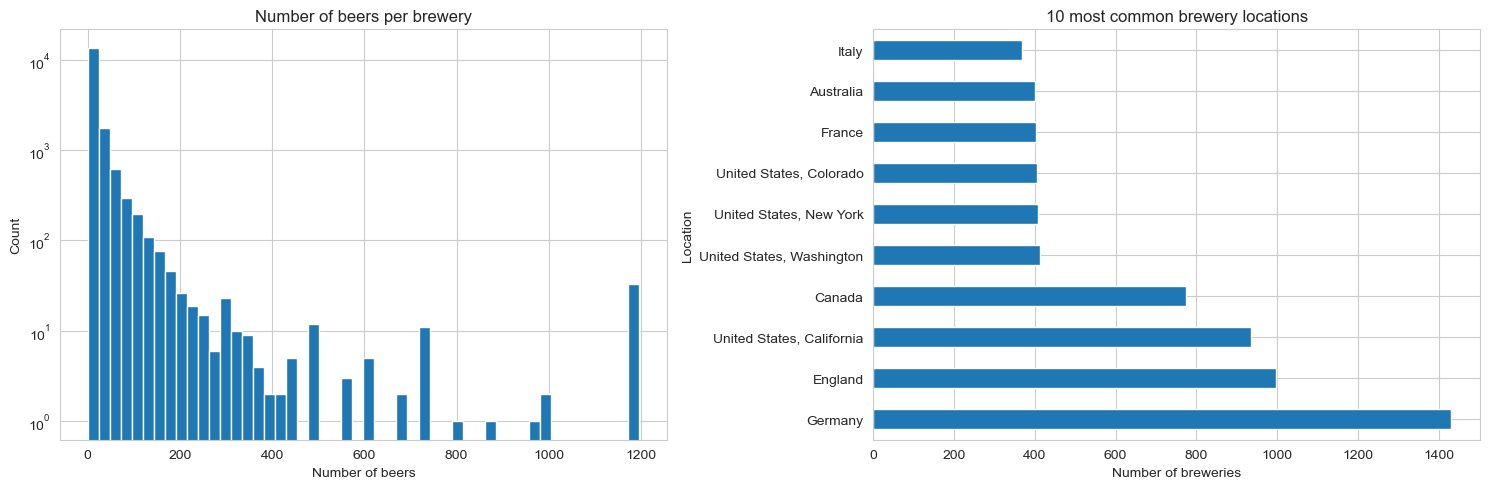

In [24]:
# Representation of beers per brewery and most common brewery locations
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
breweries_filtered['brewery_nbr_beers'].hist(bins=50, log=True)
plt.title('Number of beers per brewery')
plt.ylabel('Count')
plt.xlabel('Number of beers')
plt.subplot(1, 2, 2)
breweries_filtered['brewery_location'].value_counts(normalize=False).head(10).plot(kind='barh', title='10 most common brewery locations')
plt.xlabel('Number of breweries')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

In [25]:
# # show the number of beers per brewery as histogram using plotly.express
# fig = px.histogram(breweries_filtered, x="brewery_nbr_beers", log_y=True, nbins=150)
# fig.update_layout(title_text='Number of beers per brewery')
# fig.update_xaxes(title_text='Number of beers')
# fig.update_yaxes(title_text='Count')
# fig.show()

# # exprt the figure as html
# fig.write_html("figures/brewery_nbr_beers.html")

In [26]:
# # show the 10 most common brewery locations as barh using plotly.express
# fig = px.bar(breweries_filtered['brewery_location'].value_counts(normalize=False).head(10),
#              orientation='h',
#              title='10 most common brewery locations',
#              labels={'value': 'Number of breweries', 'index': 'Location'})
# fig.update_layout(title_text='10 most common brewery locations')
# fig.update_xaxes(title_text='Number of breweries')
# fig.update_yaxes(title_text='Location')
# fig.update_layout(showlegend=False)
# fig.show()

# # exprt the figure as html
# # fig.write_html("figures/top10_brewery_location.html")

#### 1.2.3 Users dataset 👤

In [27]:
display(users.sample(3))
print('Shape of users : ', users.shape)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
32697,223,7,irv2424.563551,irv2424,1.296990e+09,"United States, Massachusetts"
126320,3,0,cakethecat.831869,CakeTheCat,1.406196e+09,NaN
111596,1,0,jjmarek.694616,Jjmarek,1.347790e+09,NaN


Shape of users :  (153704, 6)


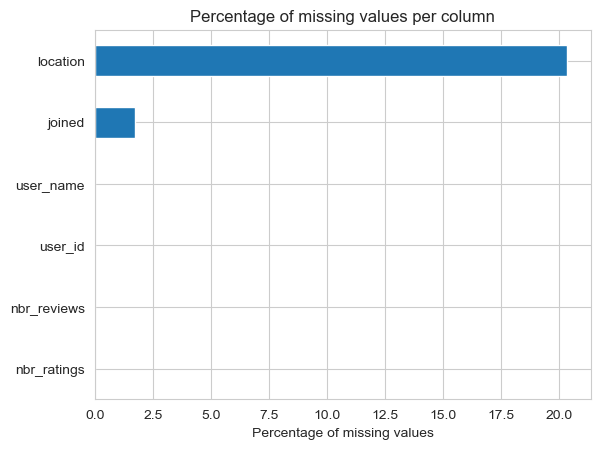

user_name                :     1 missing values (0.00%)
joined                   :  2652 missing values (1.73%)
location                 : 31279 missing values (20.35%)


In [28]:
show_missing(users)

<blockquote>

We are only missing information about when the user joined the website and locations. (and 1 username, which we drop anyway)

</blockquote>

In [29]:
users_filtered = users.drop(columns=['user_name']).copy(deep=True)

users_filtered.rename(columns={'nbr_ratings':'user_nbr_ratings',
                               'nbr_reviews':'user_nbr_reviews',
                               'joined':'user_joined',
                               'location':'user_location'}, inplace=True)

display(users_filtered.sample(3))
print('Shape of users filtered: ', users_filtered.shape)

,user_nbr_ratings,user_nbr_reviews,user_id,user_joined,user_location
48480,19,0,dsgarvin84.803500,1.402049e+09,"United States, Kentucky"
118725,1,0,clark_w.868653,1.411553e+09,"United States, Michigan"
141578,3,0,ltshrink.808635,1.403086e+09,"United States, California"


Shape of users filtered:  (153704, 5)


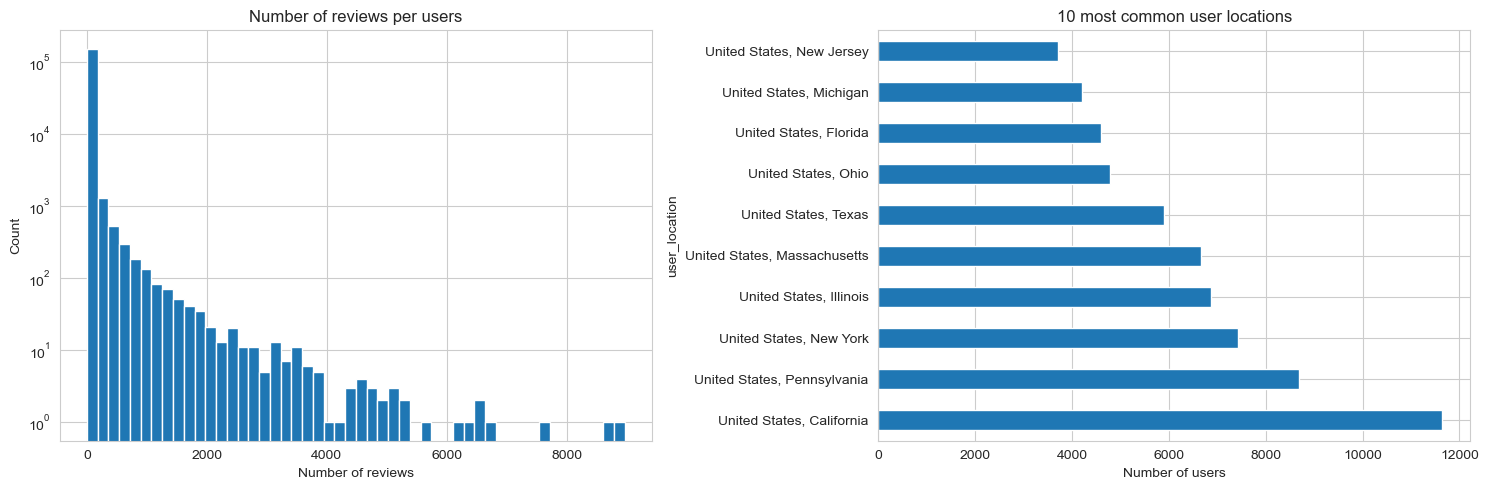

In [30]:
# Representation of reviews per user and most common user locations
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
users_filtered['user_nbr_reviews'].hist(bins=50, log=True)
plt.title('Number of reviews per users')
plt.ylabel('Count')
plt.xlabel('Number of reviews')
plt.subplot(1, 2, 2)
users_filtered['user_location'].value_counts(normalize=False).head(10).plot(kind='barh', title='10 most common user locations')
plt.xlabel('Number of users')
plt.tight_layout()
plt.show()

In [31]:
# # show the number of reviews per user as histogram using plotly.express
# fig = px.histogram(users_filtered, x="user_nbr_reviews", log_y=True, nbins=150)
# fig.update_layout(title_text='Number of reviews per user')
# fig.update_xaxes(title_text='Number of reviews')
# fig.update_yaxes(title_text='Count')
# fig.show()

# # exprt the figure as html
# fig.write_html("figures/user_nbr_reviews.html")

In [32]:
# # show the 10 most common user locations as barh using plotly.express
# fig = px.bar(users_filtered['user_location'].value_counts(normalize=False).head(10),
#              orientation='h',
#              title='10 most common user locations',
#              labels={'value': 'Number of users', 'index': 'Location'})
# fig.update_layout(title_text='10 most common user locations')
# fig.update_xaxes(title_text='Number of users')
# fig.update_yaxes(title_text='Location')
# fig.update_layout(showlegend=False)
# fig.show()

# # exprt the figure as html
# # fig.write_html("figures/top10_user_location.html")

<blockquote>

We observe that many users have no reviews at all, they will be removed from the dataset when merging. Also, the 10 most common user location are all in the US.

</blockquote>

#### 1.2.4 Reviews dataset 📝

In [33]:
display(reviews.sample(3))
print('Shape of reviews : ', reviews.shape)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
1276229,Blue Moon Belgian White,1212,Coors Brewing Company,306,Witbier,5.4,1265022000,Dster,dster.218650,3.0,3.5,3.5,3.5,3.5,3.47,"Appearance: Orange, cloudy, quarter ..."
1696157,Burton Baton,18862,Dogfish Head Brewings & Eats,64,American Double / Imperial IPA,10.0,1290423600,ryan1788a5,ryan1788a5.397706,4.0,4.0,4.0,4.5,4.0,4.20,Thought I'd review a Dogfish Head be...
520491,Terrapin Moo-Hoo Chocolate Milk Stout,62984,Terrapin Beer Company,2372,Milk / Sweet Stout,6.0,1289473200,rmolledo,rmolledo.425998,4.0,4.5,4.0,4.0,4.5,4.22,A: Dark Brown with a thin tan head.S...


Shape of reviews :  (2589586, 16)


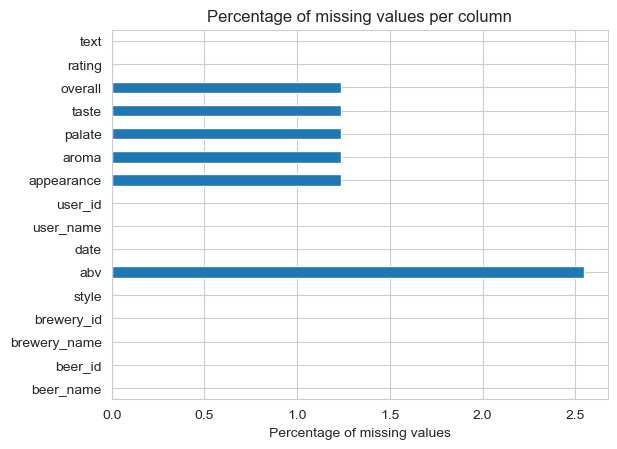

abv                      : 65983 missing values (2.55%)
user_name                :     3 missing values (0.00%)
appearance               : 32009 missing values (1.24%)
aroma                    : 32009 missing values (1.24%)
palate                   : 32009 missing values (1.24%)
taste                    : 32009 missing values (1.24%)
overall                  : 32009 missing values (1.24%)
text                     :     2 missing values (0.00%)


In [34]:
show_missing(reviews)

In [35]:
# making sure that all the missing values of the rating aspects are in the same rows

# print the number of rows that contains a NaN value for each column ['overall', 'taste', 'palate', 'aroma', 'appearance']
print('Number of rows with NaN values for each column :')
for col in ['overall', 'taste', 'palate', 'aroma', 'appearance']:
    print(col, ':', len(reviews[reviews[col].isna()]))
    
print()
# print the number of rows that contains a NaN value for all the rating aspects
missing_values = reviews[['overall', 'taste', 'palate', 'aroma', 'appearance']].isna()
missing_values['all_missing'] = missing_values.all(axis=1)
print(missing_values['all_missing'].value_counts())

Number of rows with NaN values for each column :
overall : 32009
taste : 32009
palate : 32009
aroma : 32009
appearance : 32009

all_missing
False    2557577
True       32009
Name: count, dtype: int64


<blockquote>

All the missing values are in the same rows, and they represent less than 1.5% of the dataset. We can drop them.

</blockquote>

In [36]:
# remove the columns that are not useful for our analysis
reviews_filtered = reviews.drop(columns=['user_name', 'beer_name', 'brewery_name']).copy(deep=True)

# remove the column abv because we have the information in the beers dataframe
reviews_filtered.drop(columns=['abv'], inplace=True)

#remove rows in reviews_filtered that have all_missing True in missing_values
reviews_filtered = reviews_filtered[~missing_values['all_missing']].copy(deep=True)

#remove the two reviews that have no text
reviews_filtered = reviews_filtered[~reviews_filtered['text'].isna()].copy(deep=True)

display(reviews_filtered.sample(3))
print('Shape of reviews_filtered : ', reviews_filtered.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text
15237,1163,148,Scottish Ale,997178400,brent.42,2.00,3.0,3.00,3.00,3.0,2.94,Root beer brown with a significant a...
649522,213218,140,American Pale Ale (APA),1468058400,metter98.95017,3.75,3.5,3.75,3.75,4.0,3.74,A: The beer is hazy yellow in color....
379418,2008,553,German Pilsener,1165230000,jubnat.103876,4.00,3.5,3.00,2.50,2.0,2.78,"Pours very cloudy. Strong sweet, alc..."


Shape of reviews_filtered :  (2557575, 12)


In [37]:
show_missing(reviews_filtered)

There are no missing values in this dataset.


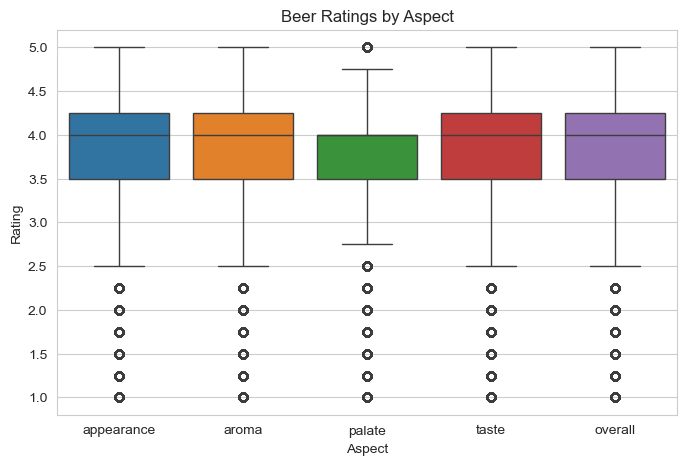

In [38]:
# boxplot for each rating column, appearance, aroma, palate, taste and overall

plt.figure(figsize=(8, 5))
sns.boxplot(data=reviews_filtered[['appearance', 'aroma', 'palate', 'taste', 'overall']])
plt.title('Beer Ratings by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Rating')
plt.show()

### 1.3 Merging the datasets 🔗 <a id='1_3-merging-the-datasets'></a>

In [39]:
# Merge reviews with users and beers and breweries
df_merged = reviews_filtered.merge(beers_filtered, how='left', on=['beer_id', 'brewery_id', 'style'])
df_merged = df_merged.merge(users_filtered, how='left', on='user_id')
df_merged = df_merged.merge(breweries_filtered, how='left', on='brewery_id')

display(df_merged.sample(3))
print('Shape of df_merged : ', df_merged.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers
767602,161704,266,American Brown Ale,1444644000,quinnspub1.592668,5.0,5.00,5.00,5.00,5.00,5.00,This is an amazing beer. Nice and Ho...,24,8,3.95,9.0,95,2,1.302862e+09,"United States, California","United States, California",53
1604591,33515,583,Winter Warmer,1424516400,hophugger.786709,3.5,2.75,2.75,2.75,2.75,2.80,Deep amber-gold color with small hea...,543,190,3.71,8.0,1988,855,1.394017e+09,"United States, Virginia","United States, Missouri",237
110441,70122,8203,Russian Imperial Stout,1308391200,ritzkiss.267056,4.0,3.50,3.50,3.50,3.50,3.53,"12oz bottle from the brewery store, ...",31,13,4.03,10.0,750,706,1.226833e+09,Canada,Canada,60


Shape of df_merged :  (2557575, 22)


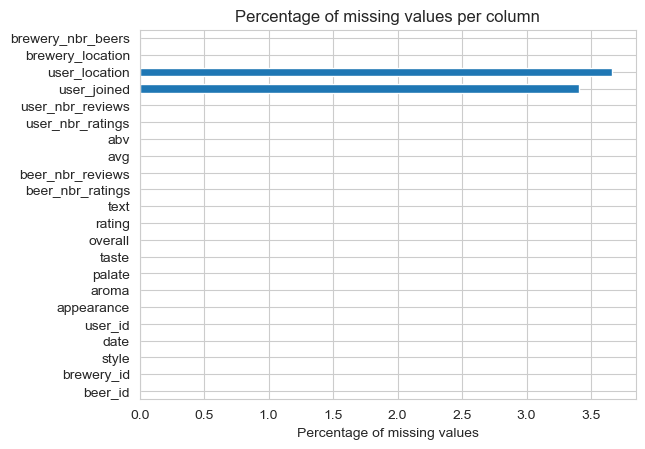

user_joined              : 87150 missing values (3.41%)
user_location            : 93668 missing values (3.66%)


In [40]:
show_missing(df_merged)

In [41]:
# We can replace missing user_joined values with the date of the first review of the user
df_merged['first_review'] = df_merged.groupby('user_id')['date'].transform('min')
df_merged['user_joined'] = df_merged['user_joined'].fillna(df_merged['first_review'])
df_merged.drop(columns=['first_review'], inplace=True)

> We have an almost complete dataset. Only information about the location of users is missing for 3.66% reviews.

In [42]:
# Save to parquet
# df_merged.to_parquet(dataset_path + 'BA_01_merged.parquet', index=False)

## 2. Data Enrichment 💸 <a id='2-data-enrichment'></a>

> Additional information is added to the dataset in order to be able to perform the analysis.

### 2.0 Original Metrics 📊 <a id='2_0-original-metrics'></a>

> These metrics are computed from the reviews dataset. They will be used later on to verify if the data filtering does not alter the dataset representation.

In [43]:
# load df from step 1
df = pd.read_parquet(dataset_path + 'BA_01_merged.parquet')

In [44]:
# for some fine analysis, we will compute the avg appearance, aroma, palate, taste and overall per beer
df['beer_id_avg_appearance'] = df.groupby('beer_id')['appearance'].transform('mean')
df['beer_id_avg_aroma'] = df.groupby('beer_id')['aroma'].transform('mean')
df['beer_id_avg_palate'] = df.groupby('beer_id')['palate'].transform('mean')
df['beer_id_avg_taste'] = df.groupby('beer_id')['taste'].transform('mean')
df['beer_id_avg_overall'] = df.groupby('beer_id')['overall'].transform('mean')
df['beer_id_avg_rating'] = df.groupby('beer_id')['rating'].transform('mean')

df['beer_id_std_appearance'] = df.groupby('beer_id')['appearance'].transform('std')
df['beer_id_std_aroma'] = df.groupby('beer_id')['aroma'].transform('std')
df['beer_id_std_palate'] = df.groupby('beer_id')['palate'].transform('std')
df['beer_id_std_taste'] = df.groupby('beer_id')['taste'].transform('std')
df['beer_id_std_overall'] = df.groupby('beer_id')['overall'].transform('std')
df['beer_id_std_rating'] = df.groupby('beer_id')['rating'].transform('std')

In [45]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_avg_rating,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,beer_id_std_rating
2002355,8682,287,Witbier,1207130400,mnstorm99.138083,4.00,3.50,4.00,3.50,4.00,3.68,"Nice cloudy yellow pour, with a nice...",2261,748,3.68,5.0,174,174,1.178878e+09,"United States, Minnesota","United States, Michigan",312,3.601626,3.658875,3.663618,3.699187,3.764905,3.693659,0.543093,0.472169,0.538612,0.515327,0.551563,0.415118
1261397,1212,306,Witbier,1435572000,andrewharemza.961247,4.00,3.75,3.75,3.75,3.75,3.77,"Cloudy yellow color, small white hea...",6950,1656,3.40,5.4,1055,919,1.426849e+09,Australia,"United States, Colorado",76,3.459712,3.348805,3.373928,3.410846,3.563113,3.426042,0.586436,0.633233,0.650484,0.666961,0.694475,0.557464
1362456,99699,192,Belgian IPA,1447671600,dcscientist.869066,3.75,3.75,3.75,3.75,3.75,3.75,"This is a perfectly fine beer, but i...",1979,298,3.75,6.2,390,390,1.411639e+09,"United States, Colorado","United States, Colorado",298,3.800347,3.751736,3.684896,3.739583,3.724826,3.739792,0.457306,0.538983,0.488872,0.559504,0.488563,0.467969


Shape of df :  (2557575, 34)


### 2.1 Serving Style 🍾🥤🚰 <a id='2_1-serving-style'></a>

>Since our goal is to look at the influence of the serving style, we need to know how each beer was served.  

#### 2.1.1 Naive Approach

> A first idea was to use a naive approach. We only look at whether a word specific to as service style has been used. 

In [46]:
def serving_type_naive(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create a new column serving_type_naive that contains the serving type of the beer using the naive approach.

    Parameters:
    - df (pd.DataFrame): The input dataframe.

    Returns:
    - pd.DataFrame: The dataframe with the added 'serving_type_naive' column.
    """
    # Create 3 different columns according to the text review, "bottle", "can", "draft"
    bottle = {'bottle', 'bottled', 'bottles', 'bomber'}
    can = {'can', 'canned', 'cans', }
    draft = {'draft', 'draught', 'tap', 'taps', 'cask', 'growler', 'keg'}
    
    # Create different columns if review text contains the word
    df['bottle'] = df['text'].astype(str).apply(lambda x: any(ele in x.lower() for ele in bottle))
    df['can'] = df['text'].astype(str).apply(lambda x: any(ele in x.lower() for ele in can))
    df['draft'] = df['text'].astype(str).apply(lambda x: any(ele in x.lower() for ele in draft))
    
    # Initialize the serving_type_naive column to 'not_set' with dtype str
    df['serving_type_naive'] = 'not_set'
    df['serving_type_naive'] = df['serving_type_naive'].astype(str)
    
    # if there are more than one true or no true, set the value to 'unknown'
    df.loc[df[['bottle', 'can', 'draft']].sum(axis=1) != 1, 'serving_type_naive'] = 'unknown'
    
    # if there is only one true, set the value to the corresponding serving type
    df.loc[df['bottle'] == True, 'serving_type_naive'] = 'bottle'
    df.loc[df['can'] == True, 'serving_type_naive'] = 'can'
    df.loc[df['draft'] == True, 'serving_type_naive'] = 'draft'

    # drop the columns bottle, can, and draft
    df.drop(['bottle', 'can', 'draft'], axis=1, inplace=True)
    
    return df

#### 2.1.2 Similarity Approach

> Compute the similarity between the reviews and a list of words specific to each serving style. The list is more exhaustive in this method, using words such as aluminium or cork for can and bottle respectively. The serving style with the highest similarity is then chosen.

In [47]:
def serving_type_sim(df: pd.DataFrame, word_bottle: str = 'data/bottle.txt', word_can: str = 'data/can.txt', word_draft: str = 'data/draft.txt', threshold: float = 0.05) -> pd.DataFrame:
    """
    Compute the cosine similarity between the review text and the list of words for each serving type. 
    Select the serving type with the highest similarity score.

    Parameters:
    - df (pd.DataFrame): The input dataframe.
    - word_bottle (str): Path to the text file containing words related to 'bottle' serving type.
    - word_can (str): Path to the text file containing words related to 'can' serving type.
    - word_draft (str): Path to the text file containing words related to 'draft' serving type.
    - threshold (float): The threshold for considering a serving type based on cosine similarity.

    Returns:
    - pd.DataFrame: The dataframe with the added 'serving_type_sim' column.
    """
    # Read the list of words from the text file
    with open(word_can, 'r') as file:
        word_can = file.read().splitlines()

    with open(word_bottle, 'r') as file:
        word_bottle = file.read().splitlines()

    with open(word_draft, 'r') as file:
        word_draft = file.read().splitlines()

    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')

    # Transform the review and words list using TF-IDF
    tfidf_matrix = vectorizer.fit_transform(df['text'].astype(str))

    can_vector = vectorizer.transform([" ".join(word_can)])
    can_vector
    bottle_vector = vectorizer.transform([" ".join(word_bottle)])
    draft_vector = vectorizer.transform([" ".join(word_draft)])

    # Calculate the cosine similarity
    cosine_sim_can = cosine_similarity(tfidf_matrix, can_vector)
    cosine_sim_bottle = cosine_similarity(tfidf_matrix, bottle_vector)
    cosine_sim_draft = cosine_similarity(tfidf_matrix, draft_vector)

    # Get the maximum similarity score and corresponding serving type
    max_sim = np.maximum.reduce([cosine_sim_bottle, cosine_sim_can, cosine_sim_draft])
    serving_type = np.where(max_sim >= threshold, np.array(['bottle', 'can', 'draft'])[np.argmax([cosine_sim_bottle, cosine_sim_can, cosine_sim_draft], axis=0)], 'unknown')

    # Add the serving_type_sim column to the dataframe
    df['serving_type_sim'] = serving_type

    return df

#### 2.1.3 Rule-based Approach

> Homemade algorithm used to find the serving type using a rule-based approach.

In [48]:
nlp = spacy.load("en_core_web_sm")

def differentiate_can(doc: Doc) -> List[str]:
    """
    Differentiate between the noun and verb form of the word "can" in the review text.

    Parameters:
    - doc (spacy.tokens.Doc): The input SpaCy Doc object representing the review text.

    Returns:
    - List[str]: A list indicating whether each occurrence of "can" is used as a noun or a verb.
    """
    verbes_nom = []
    for token in doc:
        if token.text.lower() == "can" and any(t.dep_ == "aux" for t in token.head.children):
            verbes_nom.append("verb")
        elif token.text.lower() == "can":
            verbes_nom.append("noun")

    return verbes_nom

def remove_conditional(doc: Doc) -> Doc:
    """
    Remove parts of the review text that are in the conditional form.

    Parameters:
    - doc (spacy.tokens.Doc): The input SpaCy Doc object representing the review text.

    Returns:
    - spacy.tokens.Doc: The modified SpaCy Doc object with conditional parts removed.
    """
    modified_tokens = []
    remove_sentence = False

    for sent in doc.sents:
        for token in sent:
            if remove_sentence:
                continue
            if token.text.lower() in {"would", "could", "'d", "will"}:
                subtree = [t.text for t in token.subtree]
                modified_tokens.extend(subtree[:-1])
                remove_sentence = True
            else:
                modified_tokens.append(token.text)

    modified_text = " ".join(modified_tokens)

    return nlp(modified_text)

def extract_serving_style(review: str) -> str:
    """
    Return the serving style of the beer using the rule-based approach.

    Parameters:
    - review (str): The input text of the beer review.

    Returns:
    - str: The serving style of the beer.
    """
    bottle = {'bottle', 'bottled', 'bottles', 'bomber'}
    can = {'can', 'canned', 'cans'}
    draft = {'draft', 'draught', 'tap', 'taps', 'cask', 'growler', 'on-tap', 'keg'}

    modified_doc = remove_conditional(nlp(review))
    #modified_doc = nlp(review)

    serving_styles = set()

    if any(word in modified_doc.text.lower() for word in bottle):
        serving_styles.add("bottle")
    if any(word in modified_doc.text.lower() for word in can) and "noun" in differentiate_can(modified_doc):
        serving_styles.add("can")
    if any(word in modified_doc.text.lower() for word in draft):
        serving_styles.add("draft")

    serving_style = serving_styles.pop() if len(serving_styles) == 1 else 'unknown'

    return serving_style

def process_row(row: pd.Series) -> str:
    """
    Process a row of a DataFrame, extracting the serving style of the beer from the 'text' column.

    Parameters:
    - row (pd.Series): A row of a DataFrame containing a 'text' column.

    Returns:
    - str: The serving style of the beer.
    """
    serving_style = extract_serving_style(row.text)
    return serving_style

def serving_type_rulebased(df: pd.DataFrame) -> pd.DataFrame:
    """
    Apply the rule-based serving type extraction function to each row of the DataFrame in parallel.

    Parameters:
    - df (pd.DataFrame): The input dataframe.

    Returns:
    - pd.DataFrame: The dataframe with the added 'serving_type_rulebased' column.
    """
    # Number of threads to run in parallel (adjust based on your system)
    num_threads = 6
    
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        # Apply the function in parallel to each row of the DataFrame
        results = list(tqdm(executor.map(process_row, df.itertuples(index=False)), total=len(df)))

    # Add the results to the DataFrame
    df['serving_type_rulebased'] = results
    
    return df

#### 2.1.4 Tense-based Approach

In [49]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

def differentiate_can_tense(doc: Doc) -> List[str]:
    """
    Differentiate between the noun and verb form of the word "can" in the review text.

    Parameters:
    - doc (spacy.tokens.Doc): The input SpaCy Doc object representing the review text.

    Returns:
    - List[str]: A list indicating whether each occurrence of "can" is used as a noun or a verb.
    """
    verbes_nom = []
    for token in doc:
        if token.text.lower() == "can" and any(t.dep_ == "aux" for t in token.head.children):
            verbes_nom.append("verb")
        elif token.text.lower() == "can":
            verbes_nom.append("noun")

    return verbes_nom            

def detect_tense_before_containers(text):

    bottle = {'bottle', 'bottled', 'bottles', 'bomber'}
    can = {'can', 'canned', 'cans'}
    draft = {'draft', 'draught', 'tap', 'taps', 'cask', 'on-tap','growler', 'keg'}
    modified_doc = nlp(text)
    
    sentences = nltk.sent_tokenize(text)

    container = []
    poss =[]

    # Process each sentence
    for sentence in sentences:
        # Tokenize the sentence into words
        words = word_tokenize(sentence)
        # Perform part-of-speech tagging
        pos_tags = pos_tag(words)
        # Create a spaCy doc for the sentence
        doc = nlp(" ".join(words))

        # Identify the tense based on the POS tags
        for i in range(len(pos_tags)):
            word, pos = pos_tags[i]

            if word.lower() in bottle:
                word = 'bottle'
                pos = 'NN'
            elif word.lower() in can and "noun" in differentiate_can_tense(modified_doc):
                pos = 'NN'
                #print(pos)
                word = 'can'
            elif word.lower() in draft:
                word = 'draft'

            # Check for beer container words
            if word.lower() in ['bottle', 'can', 'draft']:
    
                # A bool to check if there is a verb before the word
                #verb_bool = False

                # Check that the word is not a verb
                if pos not in ['VBD', 'VBN', 'VBG', 'VBZ', 'VBP', 'MD']:
                    verb_bool = False
                        # Find the tense of the verb just before the container word
                    for j in range(i - 1, -1, -1):
                        prev_word, prev_pos = pos_tags[j]
    
                            # Don't want the serving type if it is in the future
                        if prev_pos in ['MD']:
                            verb_bool = True
                                #print(prev_pos)
                            #break
    
                        if prev_pos in ['VBG', 'VBZ', 'VBP']:
                            poss.append(prev_pos)
                            container.append(word)
                            verb_bool = False
                            #break
                            
                            
                                
                        if prev_pos in ['VBD', 'VBN']:
                            poss.append(prev_pos)
                            container.append(word)
                            return container
                            #verb_bool = False
                            #print(prev_pos)
                               # break
                                
                                
                    # If there are no verbs before the word, it must be this serving style
                    if not verb_bool:
                        container.append(word)
                        return container                 
                    
def process_row_tb(row: pd.Series) -> str:
    """
    Process a row of a DataFrame, extracting the serving style of the beer from the 'text' column.

    Parameters:
    - row (pd.Series): A row of a DataFrame containing a 'text' column.

    Returns:
    - str: The serving style of the beer.
    """
    serving_style = extract_serving_style_tensebased(row.text)
    return serving_style

def extract_serving_style_tensebased(review: str) -> str:
    container = detect_tense_before_containers(review)
    if container is None or len(container) == 0 or len(set(container)) > 1:
        serving_style = 'unknown'
    else:
        container_str = str(container[0])
        serving_style = container_str
    return serving_style
    
def serving_type_tensebased(df):
    # Number of threads to run in parallel (adjust based on your system)
    num_threads = 6
    with ThreadPoolExecutor(max_workers=num_threads) as executor:
        # Apply the function in parallel to each row of the DataFrame
        results = list(tqdm(executor.map(process_row_tb, df.itertuples(index=False)), total=len(df)))

    # Add the results to the DataFrame
    df['serving_type_rulebased'] = results
    
    return df

#### 2.1.5 Evaluation on Manually Labeled Reviews

<blockquote>

To test which method performed best to retrieve the serving style of a beer, we manually labelled 250 reviews sampled randomly on the merged dataset. Each member of the group labelled 50 reviews as "unknown", "draft", "can" or "bottle".<break>


The goal was to learn more about the reviews, and find pattern that could help us for the rule-based method. After a few reviews, we added some words related to draft for example.


</blockquote>

In [50]:
#250 reviews for function evaluation (manually labelled)
# df_eval = df.sample(n=250, random_state=46).copy(deep=True)
# df_eval['true_serving_type'] = 'not_set'

# df_eval['true_serving_type'].value_counts()

# Function used to display a review and label the serving style
#idx = display_review(df_eval)
#df_eval = update_review_serving_type(df_eval, idx)

# df_eval.to_csv('data/BeerAdvocateEval.csv', index=False)

# Load the evaluation dataset
df_eval = pd.read_csv('data/BeerAdvocateEval.csv')

# Distribution of the serving types in the evaluation set
df_eval['true_serving_type'].value_counts()

true_serving_type
unknown    144
bottle      75
draft       24
can          7
Name: count, dtype: int64

In [51]:
# Evaluate the naive method

t1 = time.time()
df_eval = serving_type_naive(df_eval)
t_naive = time.time() - t1
print(f"Naive method took {t_naive:.4f} seconds")

print('Naive method accuracy:', compute_accuracy(df_eval['serving_type_naive'], df_eval['true_serving_type']))

Naive method took 0.0065 seconds
correct_count: 189, total_count: 250
Naive method accuracy: 0.756


In [52]:
# Evaluate the similarity method

t1 = time.time()
df_eval = serving_type_sim(df_eval, threshold=0.034)
t_sim = time.time() - t1
print(f"Similarity method took {t_sim:.4f} seconds")

print('Similarity method accuracy:', compute_accuracy(df_eval['serving_type_sim'], df_eval['true_serving_type']))

Similarity method took 0.0431 seconds
correct_count: 167, total_count: 250
Similarity method accuracy: 0.668


In [53]:
# Evaluate the rule-based method

t1 = time.time()
df_eval = serving_type_rulebased(df_eval)
t_rulebased = time.time() - t1
print(f"Rulebased method took {t_rulebased:.4f} seconds")

print('Rulebased method accuracy:', compute_accuracy(df_eval['serving_type_rulebased'], df_eval['true_serving_type']))

  0%|          | 0/250 [00:00<?, ?it/s]

100%|██████████| 250/250 [00:03<00:00, 64.32it/s]

Rulebased method took 4.0680 seconds
correct_count: 236, total_count: 250
Rulebased method accuracy: 0.944


#### 2.1.6 Apply the Best Method to the Dataset

> After classifying the whole dataset using the rule-based method, we used the tense-based method to classify the reviews that were not classified by the rule-based method. The reviews that were still not classified were removed from the dataset.

In [54]:
df = pd.read_parquet(dataset_path + 'BA_02_serving_type.parquet')

In [55]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_avg_rating,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,beer_id_std_rating,serving_type_rulebased
307877,238047,24940,American Wild Ale,1467626400,scottfrie.364399,4.25,4.25,4.25,4.25,4.25,4.25,12oz bottle into snifter. Bottled su...,48,12,4.14,7.0,2156,2149,1.251454e+09,"United States, California","United States, California",128,3.958333,4.062500,4.250000,4.166667,4.166667,4.139167,0.234359,0.188445,0.369274,0.288675,0.307729,0.237275,bottle
452438,9334,123,Bock,1053252000,greenlabel.2005,4.00,4.00,4.50,4.50,4.50,4.35,2003 is the first year in which Goat...,31,27,3.74,6.6,170,151,1.051524e+09,"United States, New Hampshire","United States, Massachusetts",46,3.870370,3.611111,3.685185,3.814815,3.851852,3.763704,0.406500,0.543021,0.574258,0.606823,0.647700,0.516722,bottle
5869,245,12142,Scottish Gruit / Ancient Herbed Ale,1100948400,cypressbob.3708,3.50,4.00,4.00,4.00,3.00,3.77,Cask cond. at the NI CAMRA festPours...,1151,722,3.75,5.0,604,604,1.069326e+09,Northern Ireland,Scotland,52,3.588112,3.739161,3.643706,3.791608,3.794056,3.752685,0.505327,0.564289,0.581486,0.553762,0.617766,0.463875,draft


Shape of df :  (1137574, 35)


In [56]:
for serving_type, count in df['serving_type_rulebased'].value_counts().items():
    percentage = count / len(df) * 100
    print(f"{serving_type}: {percentage:.2f}%")

bottle: 70.89%
draft: 23.42%
can: 5.69%


> The dataset is very unbalanced, more than 70% of the reviews are classified as bottle, whereas less than 6% are classified as can!

### 2.2 Sentiment Analysis 🤔 <a id='2_2-sentiment-analysis'></a>

> An additional column was added to the reviews dataset, containing the sentiment of the review. The sentiment was computed using the TextBlob library. The sentiment is a float between -1 and 1, where -1 is a negative sentiment and 1 is a positive sentiment. The sentiment is computed using the polarity of the review. It will be used as an additional element of comparison between the different serving styles.

In [57]:
# df = sentiment_analysis(df)
# df.to_parquet(dataset_path + 'BA_03_sentiment_analysis.parquet', index=False)

df = pd.read_parquet(dataset_path + 'BA_03_sentiment_analysis.parquet')

In [58]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_avg_rating,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,beer_id_std_rating,serving_type_rulebased,polarity
319804,9317,447,American Malt Liquor,1209808800,lumpyguitar.175477,3.00,2.00,3.00,3.0,3.5,2.86,"I can't even believe I bought this, ...",95,43,2.50,5.86,240,240,1.196248e+09,"United States, New York","United States, California",90,2.851190,2.321429,2.511905,2.529762,2.636905,2.519048,0.769185,0.670106,0.742754,0.819359,0.823071,0.683666,bottle,0.079588
844242,72430,4,American Wild Ale,1434362400,rollzroyce21.385411,4.75,4.25,3.75,4.0,4.0,4.08,- Bottled on 25-Feb-15 - 375mL bottl...,451,73,4.24,6.60,1499,255,1.256378e+09,"United States, California","United States, Maine",150,4.167808,4.236301,4.085616,4.243151,4.212329,4.217123,0.425030,0.499810,0.421265,0.517024,0.470799,0.424403,bottle,0.297917
966192,92615,29573,Saison / Farmhouse Ale,1444212000,flagmantho.300408,4.25,4.00,3.75,4.0,4.0,3.99,Poured from 375mL corked &amp; caged...,76,20,3.98,6.50,3219,3219,1.235041e+09,"United States, Washington","United States, Oregon",84,4.037500,4.037500,4.012500,3.987500,4.012500,4.012500,0.481739,0.407778,0.329224,0.534808,0.534808,0.434607,bottle,0.305952


Shape of df :  (1137574, 36)


### 2.3 Metrics Update 🔁 <a id='2_3-metrics-update'></a>

> The metrics updated in this step will be compared with the ones computed before the filtering. Since our dataset has been reduced by approximately half, we will check if our final dataset is still representative of the initial one. 

In [59]:
# compute the number of valid reviews per user
df['user_filtered_nbr_reviews'] = df.groupby('user_id')['user_id'].transform('count')

# compute the number of valid reviews per beer
df['beer_id_filtered_nbr_reviews'] = df.groupby('beer_id')['beer_id'].transform('count')

In [60]:
# for some fine analysis, we will compute the avg appearance, aroma, palate, taste and overall per beer
df['beer_id_filtered_avg_appearance'] = df.groupby('beer_id')['appearance'].transform('mean')
df['beer_id_filtered_avg_aroma'] = df.groupby('beer_id')['aroma'].transform('mean')
df['beer_id_filtered_avg_palate'] = df.groupby('beer_id')['palate'].transform('mean')
df['beer_id_filtered_avg_taste'] = df.groupby('beer_id')['taste'].transform('mean')
df['beer_id_filtered_avg_overall'] = df.groupby('beer_id')['overall'].transform('mean')
df['beer_id_filtered_avg_rating'] = df.groupby('beer_id')['rating'].transform('mean')

df['beer_id_filtered_std_appearance']= df.groupby('beer_id')['appearance'].transform('std')
df['beer_id_filtered_std_aroma']= df.groupby('beer_id')['aroma'].transform('std')
df['beer_id_filtered_std_palate']= df.groupby('beer_id')['palate'].transform('std')
df['beer_id_filtered_std_taste']= df.groupby('beer_id')['taste'].transform('std')
df['beer_id_filtered_std_overall']= df.groupby('beer_id')['overall'].transform('std')
df['beer_id_filtered_std_rating']= df.groupby('beer_id')['rating'].transform('std')

In [61]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_avg_rating,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,beer_id_std_rating,serving_type_rulebased,polarity,user_filtered_nbr_reviews,beer_id_filtered_nbr_reviews,beer_id_filtered_avg_appearance,beer_id_filtered_avg_aroma,beer_id_filtered_avg_palate,beer_id_filtered_avg_taste,beer_id_filtered_avg_overall,beer_id_filtered_avg_rating,beer_id_filtered_std_appearance,beer_id_filtered_std_aroma,beer_id_filtered_std_palate,beer_id_filtered_std_taste,beer_id_filtered_std_overall,beer_id_filtered_std_rating
912929,8388,2097,English Barleywine,1330167600,oline73.371504,3.5,4.50,4.50,4.5,4.5,4.44,Poured from a bottle into a Chimay g...,743,207,4.34,14.5,6302,1511,1.253268e+09,"United States, Maryland","United States, Michigan",334,3.888889,4.434783,4.153382,4.380435,4.235507,4.312802,0.510542,0.451505,0.535477,0.435685,0.498573,0.361559,bottle,0.173083,1402,120,3.889583,4.40625,4.147917,4.408333,4.225000,4.314417,0.494503,0.481880,0.531068,0.420001,0.523000,0.364846
127076,45165,12677,Märzen / Oktoberfest,1275991200,ruudjh.323109,3.5,3.50,3.50,3.5,3.5,3.50,"0.5 l bottle, bought in Germany, dur...",14,10,3.56,4.9,491,476,1.240394e+09,Netherlands,Germany,18,3.861111,3.388889,3.555556,3.583333,3.583333,3.551111,0.397475,0.435013,0.512009,0.414578,0.414578,0.388183,bottle,0.141667,253,4,3.875000,3.56250,3.750000,3.687500,3.687500,3.675000,0.322749,0.125000,0.204124,0.239357,0.239357,0.184300
622883,89292,1114,Gueuze,1375092000,joel66.692225,4.5,4.25,4.25,4.5,4.5,4.42,"Unlabeled bottle, pre release. Drank...",162,16,4.46,6.0,224,38,1.346494e+09,"United States, New York","United States, Pennsylvania",312,4.203125,4.406250,4.406250,4.515625,4.515625,4.462500,0.291815,0.327554,0.271953,0.265656,0.232177,0.235726,bottle,0.379870,22,12,4.291667,4.50000,4.458333,4.562500,4.583333,4.527500,0.179435,0.282038,0.179435,0.155395,0.123091,0.111365


Shape of df :  (1137574, 50)


### 2.4 Geographical Grouping 🌎 <a id='2_4-geographical-grouping'></a>

> Additional information about the location of the users was added to the dataset. Each country was assigned to a sub-region. Additionally, US users were assigned to a state. This information will be used to compare the serving style in different regions and states.

In [62]:
# Load dataset with countries information
countries = pd.read_csv('data/countries_region.csv')[['name', 'sub-region']]
display(countries.sample(3))
print('Shape of countries : ', countries.shape)

,name,sub-region
244,Wallis and Futuna,Polynesia
97,Heard Island and McDonald Islands,Australia and New Zealand
232,Ukraine,Eastern Europe


Shape of countries :  (249, 2)


In [63]:
# add a column user_country with the country of the user
df['user_location'] = df['user_location'].fillna('Unknown')
df['user_country'] = df['user_location'].apply(lambda x: 'United States of America' if 'United States, ' in x else x)

df[['user_location', 'user_country']].sample(3)

,user_location,user_country
739045,"United States, North Carolina",United States of America
327485,Unknown,Unknown
256977,"United States, Utah",United States of America


In [64]:
# rename or add country in countries df where the name is different than in user_country

# rename the column of countries that cause problems 
def rename_countries(old_name, new_name):
    countries['name'] = countries['name'].replace(old_name, new_name)
    return

rename_countries('Bolivia (Plurinational State of)', 'Bolivia')
rename_countries('Tanzania, United Republic of', 'Tanzania')
rename_countries('South Georgia and the South Sandwich Islands', 'South Georgia and South Sandwich Islands')
rename_countries('Fiji', 'Fiji Islands')
rename_countries('New Zealand', 'Aotearoa')
rename_countries('Taiwan, Province of China', 'Taiwan')
rename_countries('North Macedonia', 'Macedonia')
rename_countries('Viet Nam', 'Vietnam')
rename_countries('Russian Federation', 'Russia')
rename_countries('Czechia', 'Czech Republic')
rename_countries('Slovakia', 'Slovak Republic')
rename_countries('Svalbard and Jan Mayen', 'Svalbard and Jan Mayen Islands')

new_countries = pd.DataFrame({'name': ['England', 'Wales', 'Northern Ireland', 'Scotland', 'Unknown'], 'sub-region': ['Northern Europe','Northern Europe','Northern Europe','Northern Europe', 'Unknown']})

countries = pd.concat([countries, new_countries]).drop_duplicates().reset_index(drop=True)

In [65]:
# add column user_subregion to df
df = df.merge(countries[['name', 'sub-region']], left_on='user_country', right_on='name', how='left')
df.rename(columns={'sub-region': 'user_subregion'}, inplace=True)
df = df.drop(columns=['name'])

display(df[['user_location', 'user_country', 'user_subregion']].sample(3))

,user_location,user_country,user_subregion
259955,"United States, Colorado",United States of America,Northern America
321488,"United States, California",United States of America,Northern America
272286,"United States, Massachusetts",United States of America,Northern America


In [66]:
# add column with US state for USA users and NaN for others
df['user_US_state'] = df['user_location'].apply(lambda x: x.split(', ')[1] if 'United States' in x else np.nan)
display(df[['user_location', 'user_country', 'user_subregion', 'user_US_state']].sample(3))

,user_location,user_country,user_subregion,user_US_state
647425,"United States, New Jersey",United States of America,Northern America,New Jersey
385876,"United States, Maryland",United States of America,Northern America,Maryland
601997,"United States, Ohio",United States of America,Northern America,Ohio


In [67]:
# drop column user_location
df.drop(columns=['user_location'], inplace=True)

### 2.5 Beer Style Grouping 🍻 <a id='2_5-beer-style-grouping'></a>

> The beer styles were grouped in more general categories. This will allow us to compare the serving style in different beer groupes rather than the specific beer styles.

In [68]:
# Define the beer style groups
beer_groups = {
    # Ales
    'Altbier': 'Ales',
    'American Black Ale': 'Ales',
    'American Pale Ale (APA)': 'Ales',
    'American Amber / Red Ale': 'Ales',
    'American Brown Ale': 'Ales',
    'American Blonde Ale': 'Ales',
    'American IPA': 'Ales',
    'American Porter': 'Ales',
    'American Wild Ale': 'Ales',
    'Baltic Porter': 'Ales',
    'Belgian Pale Ale': 'Ales',
    'Belgian Dark Ale': 'Ales',
    'Belgian IPA': 'Ales',
    'Bière de Garde': 'Ales',
    'Cream Ale': 'Ales',
    'Dubbel': 'Ales',
    'English Bitter': 'Ales',
    'English Brown Ale': 'Ales',
    'English Dark Mild Ale': 'Ales',
    'English India Pale Ale (IPA)': 'Ales',
    'English Pale Ale': 'Ales',
    'English Pale Mild Ale': 'Ales',
    'English Porter': 'Ales',
    'Extra Special / Strong Bitter (ESB)': 'Ales',
    'Irish Red Ale': 'Ales',
    'Kölsch': 'Ales',
    'Rye Beer': 'Ales',
    'Saison / Farmhouse Ale': 'Ales',
    'Scottish Ale': 'Ales',
    'Scottish Gruit / Ancient Herbed Ale': 'Ales',

    # Stouts
    'American Double / Imperial Stout': 'Stouts',
    'American Stout': 'Stouts',
    'English Stout': 'Stouts',
    'Foreign / Export Stout': 'Stouts',
    'Irish Dry Stout': 'Stouts',
    'Milk / Sweet Stout': 'Stouts',
    'Oatmeal Stout': 'Stouts',
    'Russian Imperial Stout': 'Stouts',

    # Lagers
    'American Malt Liquor' : 'Lagers',
    'American Adjunct Lager': 'Lagers',
    'American Pale Lager': 'Lagers',
    'American Amber / Red Lager': 'Lagers',
    'California Common / Steam Beer': 'Lagers',
    'Czech Pilsener': 'Lagers',
    'Dortmunder / Export Lager': 'Lagers',
    'Euro Dark Lager': 'Lagers',
    'Euro Pale Lager': 'Lagers',
    'Euro Strong Lager': 'Lagers',
    'German Pilsener': 'Lagers',
    'Light Lager': 'Lagers',
    'Munich Dunkel Lager': 'Lagers',
    'Munich Helles Lager': 'Lagers',
    'Märzen / Oktoberfest': 'Lagers',
    'Schwarzbier': 'Lagers',
    'Vienna Lager': 'Lagers',
    
    # Strong Ales
    'American Barleywine': 'Strong Ales',
    'American Double / Imperial Pilsner': 'Strong Ales',
    'American Double / Imperial IPA': 'Strong Ales',
    'American Strong Ale': 'Strong Ales',
    'Belgian Strong Pale Ale': 'Strong Ales',
    'Belgian Strong Dark Ale': 'Strong Ales',
    'English Barleywine': 'Strong Ales',
    'English Strong Ale': 'Strong Ales',
    'Eisbock': 'Strong Ales',
    'Old Ale': 'Strong Ales',
    'Quadrupel (Quad)': 'Strong Ales',
    'Wheatwine': 'Strong Ales',
    
    # Wheat Beers
    'American Dark Wheat Ale': 'Wheat Beers',
    'American Pale Wheat Ale': 'Wheat Beers',
    'Berliner Weissbier': 'Wheat Beers',
    'Dunkelweizen': 'Wheat Beers',
    'Hefeweizen': 'Wheat Beers',
    'Kristalweizen': 'Wheat Beers',
    'Weizenbock': 'Wheat Beers',
    'Witbier': 'Wheat Beers',
    
    # Specialty and Unique Beers
    'Bière de Champagne / Bière Brut': 'Specialty and Unique Beers',
    'Black & Tan': 'Specialty and Unique Beers',
    'Chile Beer': 'Specialty and Unique Beers',
    'Fruit / Vegetable Beer': 'Specialty and Unique Beers',
    'Herbed / Spiced Beer': 'Specialty and Unique Beers',
    'Low Alcohol Beer': 'Specialty and Unique Beers',
    'Pumpkin Ale': 'Specialty and Unique Beers',
    'Rauchbier': 'Specialty and Unique Beers',
    'Roggenbier': 'Specialty and Unique Beers',
    'Sahti': 'Specialty and Unique Beers',
    'Smoked Beer': 'Specialty and Unique Beers',
    
    # Seasonal and Celebration Beers
    'Bock': 'Seasonal and Celebration Beers',
    'Doppelbock': 'Seasonal and Celebration Beers',
    'Maibock / Helles Bock': 'Seasonal and Celebration Beers',
    'Winter Warmer': 'Seasonal and Celebration Beers',
    
    # Sour Beers
    'Faro': 'Sour Beers',
    'Flanders Oud Bruin': 'Sour Beers',
    'Flanders Red Ale': 'Sour Beers',
    'Gose': 'Sour Beers',
    'Gueuze': 'Sour Beers',
    'Lambic - Fruit': 'Sour Beers',
    'Lambic - Unblended': 'Sour Beers',
    
    # Historical and Traditional Beers
    'Braggot': 'Historical and Traditional Beers',
    'Happoshu': 'Historical and Traditional Beers',
    'Kellerbier / Zwickelbier': 'Historical and Traditional Beers',
    'Kvass': 'Historical and Traditional Beers',
    'Scotch Ale / Wee Heavy': 'Historical and Traditional Beers',
    'Tripel': 'Historical and Traditional Beers',
    'Japanese Rice Lager': 'Historical and Traditional Beers',
}

In [69]:
# add a column with beer style group
df['beer_group'] = df['style'].map(beer_groups)

In [70]:
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')

In [71]:
# # create a sunburst chart with plotly.express showing the beer group and beer styles
# fig = px.sunburst(df, 
#                   path=['beer_group', 'style'], title='Beer groups and beer styles',
#                   color_discrete_sequence = ['orange'],)
# fig.update_layout(title_text='Beer groups and beer styles')
# fig.show()

# # export the figure as html
# # fig.write_html("figures/beer_groups_styles.html")

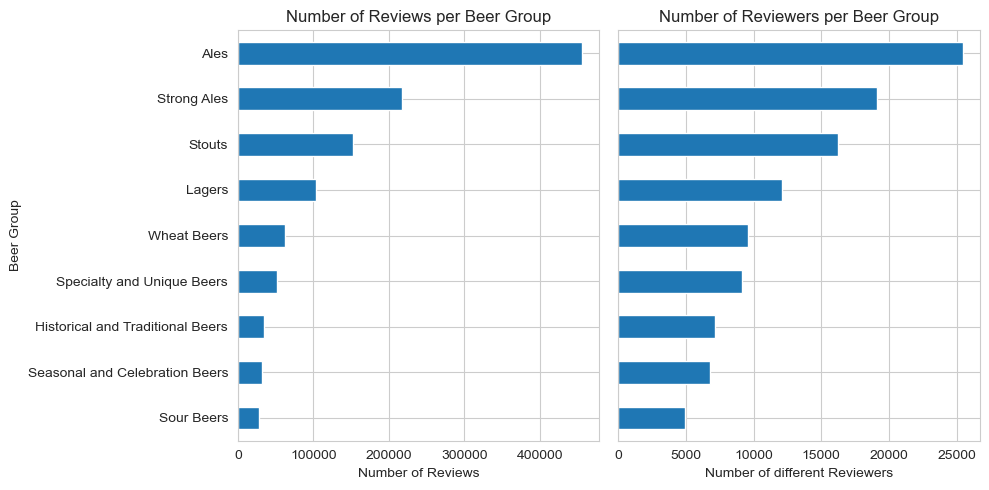

In [72]:
# Create a 1x2 plot with subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot the number of reviews per beer group
df['beer_group'].value_counts().sort_values().plot(kind='barh', ax=axs[0])
axs[0].set_xlabel('Number of Reviews')
axs[0].set_ylabel('Beer Group')
axs[0].set_title('Number of Reviews per Beer Group')

# Plot the number of reviewers per beer group
df.groupby('beer_group')['user_id'].nunique().sort_values().plot(kind='barh', ax=axs[1])
axs[1].set_xlabel('Number of different Reviewers')
axs[1].set_title('Number of Reviewers per Beer Group')

plt.tight_layout()
plt.show()

In [73]:
# Export complete dataset to parquet
# df.to_parquet(dataset_path + 'BA_04_complete.parquet', index=False)

## 3. Verifying the Dataset Representation 🔎 <a id='3-verifying-the-dataset-representation'></a>

> We want to make sure that our dataset is still representative of the initial one. We will compare the metrics computed before and after the filtering.

In [2]:
# Load the complete dataset
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')

In [75]:
display(df.sample(3))
print('Shape of df : ', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_avg_rating,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,beer_id_std_rating,serving_type_rulebased,polarity,user_filtered_nbr_reviews,beer_id_filtered_nbr_reviews,beer_id_filtered_avg_appearance,beer_id_filtered_avg_aroma,beer_id_filtered_avg_palate,beer_id_filtered_avg_taste,beer_id_filtered_avg_overall,beer_id_filtered_avg_rating,beer_id_filtered_std_appearance,beer_id_filtered_std_aroma,beer_id_filtered_std_palate,beer_id_filtered_std_taste,beer_id_filtered_std_overall,beer_id_filtered_std_rating,user_country,user_subregion,user_US_state,beer_group
159870,20210,2444,Low Alcohol Beer,1305626400,mdfb79.414386,3.0,1.50,1.50,1.0,1.00,1.29,My girlfriend brought me back a coup...,6,4,1.19,0.01,4508,3779,1.263208e+09,Brazil,14,2.500000,1.312500,1.500000,1.000000,1.125000,1.240000,0.577350,0.239357,0.408248,0.000000,0.250000,0.092014,bottle,-0.024382,2557,1,3.000000,1.50000,1.500000,1.000000,1.000000,1.290000,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,Northern America,New York,Specialty and Unique Beers
141452,1946,142,Hefeweizen,1336557600,magictacosinus.607448,4.5,4.50,4.00,3.5,3.50,3.85,"I've been having this for years, but...",4505,1696,4.04,5.00,768,559,1.309514e+09,Germany,19,4.099702,3.953274,3.976190,4.053869,4.148512,4.043899,0.478965,0.515878,0.518449,0.509294,0.504342,0.411206,bottle,0.168269,528,715,4.098601,3.94965,3.986014,4.048252,4.137063,4.039399,0.464117,0.517972,0.506243,0.517665,0.509975,0.416110,United States of America,Northern America,California,Wheat Beers
982695,115564,29556,American Double / Imperial IPA,1427540400,mikedhoppy.762641,4.0,4.25,4.25,4.5,4.25,4.34,Big fan of this brewery: the staff a...,225,36,3.92,8.60,120,13,1.383736e+09,"United States, Connecticut",31,4.058824,3.941176,3.955882,3.904412,3.955882,3.940000,0.394368,0.364415,0.285181,0.384426,0.310611,0.295707,draft,0.142316,5,13,4.115385,4.00000,4.019231,3.980769,4.057692,4.014615,0.376599,0.250000,0.189889,0.330113,0.181253,0.226665,United States of America,Northern America,Connecticut,Strong Ales


Shape of df :  (1137574, 53)


In [76]:
#list of columns to keep
columns_beer = [
    'beer_nbr_reviews',
    'beer_id_filtered_nbr_reviews',
    
    'beer_id_avg_appearance',
    'beer_id_filtered_avg_appearance',
    
    'beer_id_avg_aroma',
    'beer_id_filtered_avg_aroma',
    
    'beer_id_avg_palate',
    'beer_id_filtered_avg_palate',
    
    'beer_id_avg_taste',
    'beer_id_filtered_avg_taste',
    
    'beer_id_avg_overall',
    'beer_id_filtered_avg_overall',
    
    'beer_id_avg_rating',
    'beer_id_filtered_avg_rating',
    
    'beer_id_std_appearance',
    'beer_id_filtered_std_appearance',
    
    'beer_id_std_aroma',
    'beer_id_filtered_std_aroma',
    
    'beer_id_std_palate',
    'beer_id_filtered_std_palate',
    
    'beer_id_std_taste',
    'beer_id_filtered_std_taste',
    
    'beer_id_std_overall',
    'beer_id_filtered_std_overall',
    
    'beer_id_std_rating',
    'beer_id_filtered_std_rating',
]

columns_user = ['user_nbr_reviews', 
                'user_filtered_nbr_reviews']

# Group by beer_id and user_id and perform aggregation
df_beer = df.groupby('beer_id').agg({col: 'first' for col in columns_beer})
df_user = df.groupby('user_id').agg({col: 'first' for col in columns_user})

In [77]:
display(df_beer.sample(3))

,beer_nbr_reviews,beer_id_filtered_nbr_reviews,beer_id_avg_appearance,beer_id_filtered_avg_appearance,beer_id_avg_aroma,beer_id_filtered_avg_aroma,beer_id_avg_palate,beer_id_filtered_avg_palate,beer_id_avg_taste,beer_id_filtered_avg_taste,beer_id_avg_overall,beer_id_filtered_avg_overall,beer_id_avg_rating,beer_id_filtered_avg_rating,beer_id_std_appearance,beer_id_filtered_std_appearance,beer_id_std_aroma,beer_id_filtered_std_aroma,beer_id_std_palate,beer_id_filtered_std_palate,beer_id_std_taste,beer_id_filtered_std_taste,beer_id_std_overall,beer_id_filtered_std_overall,beer_id_std_rating,beer_id_filtered_std_rating
beer_id,,,,,,,,,,,,,,,,,,,,,,,,,,
117031,2,1,3.50,3.00,3.750,3.50,3.50,3.0,3.875,3.75,3.75,3.50,3.760,3.52,0.707107,NaN,0.353553,NaN,0.707107,NaN,0.176777,NaN,0.353553,NaN,0.339411,NaN
258983,2,1,3.75,3.75,3.625,3.50,3.75,4.0,3.625,3.50,3.75,3.75,3.675,3.62,0.000000,NaN,0.176777,NaN,0.353553,NaN,0.176777,NaN,0.000000,NaN,0.077782,NaN
257640,1,1,4.50,4.50,4.250,4.25,4.50,4.5,4.500,4.50,4.50,4.50,4.440,4.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
display(df_user.sample(3))

,user_nbr_reviews,user_filtered_nbr_reviews
user_id,,
mark13.915184,52,50
janubio.14451,719,292
brews4la.811111,12,4


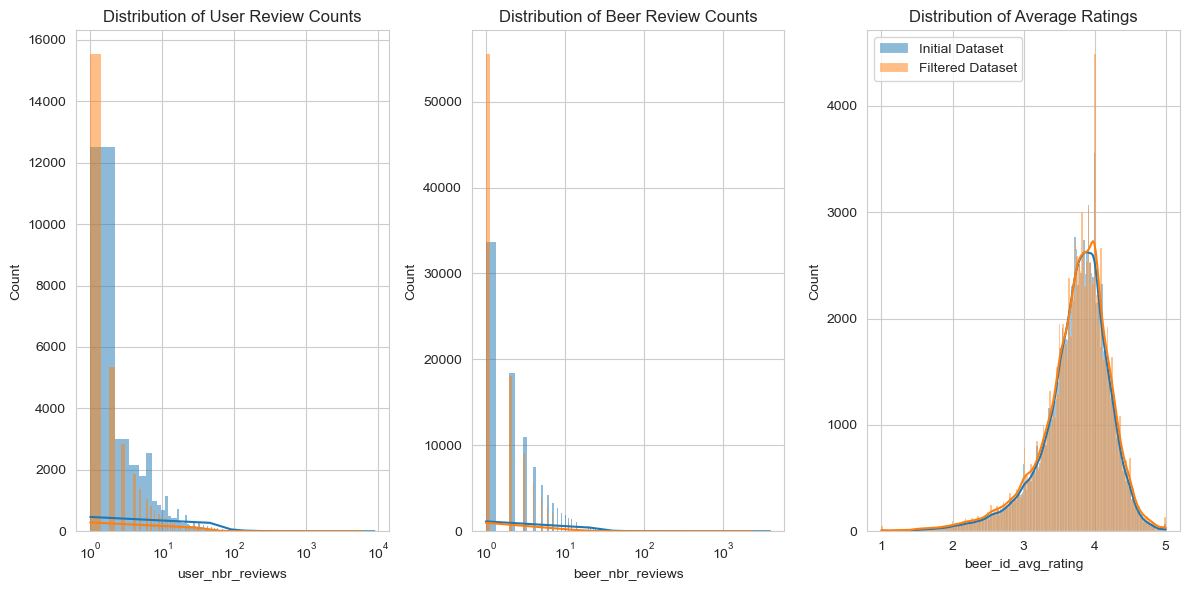

In [79]:
# Check the distribution of key columns to see if they are similar
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

# Distribution of User Review Counts
axes[0].set_title('Distribution of User Review Counts')
sns.histplot(df_user['user_nbr_reviews'], kde=True, ax=axes[0], label='Initial Dataset')
sns.histplot(df_user['user_filtered_nbr_reviews'], kde=True, ax=axes[0], label='Filtered Dataset')
axes[0].set_xscale('log')

# Distribution of Beer Review Counts
axes[1].set_title('Distribution of Beer Review Counts')
sns.histplot(df_beer['beer_nbr_reviews'], kde=True, ax=axes[1], label='Initial Dataset')
sns.histplot(df_beer['beer_id_filtered_nbr_reviews'], kde=True, ax=axes[1], label='Filtered Dataset')
axes[1].set_xscale('log')

# Distribution of Average Ratings
axes[2].set_title('Distribution of Average Ratings')
sns.histplot(df_beer['beer_id_avg_rating'], kde=True, ax=axes[2], label='Initial Dataset')
sns.histplot(df_beer['beer_id_filtered_avg_rating'], kde=True, ax=axes[2], label='Filtered Dataset')

plt.tight_layout()
plt.legend()
plt.show()

In [80]:
# compare number of reviews 
t_stat, p_value = ttest_ind(df_user['user_nbr_reviews'], df_user['user_filtered_nbr_reviews'])
print("T-Test Results: Number of user reviews ")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

t_stat, p_value = ttest_ind(df_beer['beer_nbr_reviews'], df_beer['beer_id_filtered_nbr_reviews'])
print("\nT-Test Results: Number of beer reviews ")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Test Results: Number of user reviews 
T-Statistic: 22.686736067642155, P-Value: 1.4070387244650097e-113

T-Test Results: Number of beer reviews 
T-Statistic: 35.087520901667204, P-Value: 5.3695928995850015e-269


> Since the p-values are below 0.05, we can affirm that the distribution of the number of reviews per user and per beer has significantly changed. This makes sense, since we lost more than half the reviews by removing unknown serving styles.

In [81]:
# compare similar infos on appearance, aroma, palate, taste, overall and rating
t_stat, p_value = ttest_ind(df_beer['beer_id_avg_appearance'], df_beer['beer_id_filtered_avg_appearance'])
print("\nT-Test Results: Average Appearance")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

t_stat, p_value = ttest_ind(df_beer['beer_id_avg_aroma'], df_beer['beer_id_filtered_avg_aroma'])
print("\nT-Test Results: Average Aroma")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

t_stat, p_value = ttest_ind(df_beer['beer_id_avg_palate'], df_beer['beer_id_filtered_avg_palate'])
print("\nT-Test Results: Average Palate")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

t_stat, p_value = ttest_ind(df_beer['beer_id_avg_taste'], df_beer['beer_id_filtered_avg_taste'])
print("\nT-Test Results: Average Taste")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

t_stat, p_value = ttest_ind(df_beer['beer_id_avg_overall'], df_beer['beer_id_filtered_avg_overall'])
print("\nT-Test Results: Average Overall")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

t_stat, p_value = ttest_ind(df_beer['beer_id_avg_rating'], df_beer['beer_id_filtered_avg_rating'])
print("\nT-Test Results: Average Rating")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Test Results: Average Appearance
T-Statistic: 2.225382619954089, P-Value: 0.026056524639576115

T-Test Results: Average Aroma
T-Statistic: 2.6578061840660827, P-Value: 0.00786565220581063

T-Test Results: Average Palate
T-Statistic: 2.097705124875447, P-Value: 0.0359322853658205

T-Test Results: Average Taste
T-Statistic: 2.6436374978087365, P-Value: 0.00820259819873397

T-Test Results: Average Overall
T-Statistic: 3.2194249899029117, P-Value: 0.0012846569737896155

T-Test Results: Average Rating
T-Statistic: 2.887284833255068, P-Value: 0.00388618308220899


> Since all p-values are smaller than 0.05, we can reject the null hypothesis that the means of the two samples are equal. This means that the filtering has an impact on the dataset representation. Although the distributions look similar, the filtered dataset is not representative of the initial one.

> This does not necessarly mean that the conclusions we draw from the filtered dataset are wrong. We can still evaluate the impact of the serving style on the tasting profile.

## 4. Visualizations 📊 <a id='4-visualizations'></a>

> Some visualizations were made to better understand the data and to find patterns.

In [82]:
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')

### 4.1 Temporal Analysis 📅 <a id='4_1-temporal-analysis'></a>

In [83]:
# add column with review date
df['review_date'] = pd.to_datetime(df['date'], unit='s')

# extract year and month from review date
df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.month

# drop column review date
df.drop(columns=['review_date'], inplace=True)

# keep only reviews from 2002 to 2016
df = df[df['review_year'] <= 2016]
df = df[df['review_year'] >= 2002]

In [84]:
# for each year, count the number of reviews for each month and store it in a new df
df_monthly = df.groupby(['review_year', 'review_month']).agg({'text': 'count'})

# change the df to a 180x3 df with columns year, month and number of reviews
df_monthly = df_monthly.reset_index().rename(columns={'text': 'nbr_reviews'})

# add a column with the number of reviews per year
df_monthly['nbr_reviews_year'] = df_monthly.groupby('review_year')['nbr_reviews'].transform('sum')

# add a column with nbr_reviews / nbr_reviews_year
df_monthly['percentage'] = df_monthly['nbr_reviews'] / df_monthly['nbr_reviews_year']

df_monthly.sample(5)

,review_year,review_month,nbr_reviews,nbr_reviews_year,percentage
66,2007,7,4173,54409,0.076697
120,2012,1,13807,115277,0.119772
88,2009,5,9114,107063,0.085127
175,2016,8,5908,78519,0.075243
39,2005,4,2156,30469,0.070760


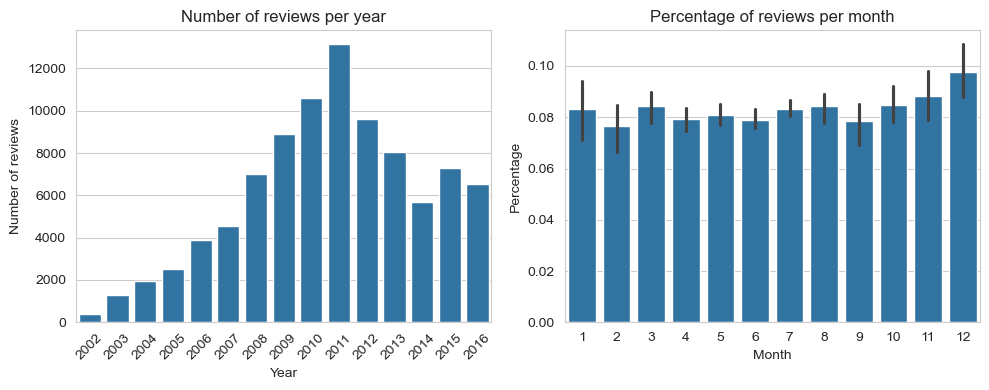

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# show the number of reviews per year
sns.barplot(x='review_year', y='nbr_reviews', data=df_monthly, ax=axes[0], errorbar=None)
axes[0].set_title('Number of reviews per year')
axes[0].set_xlabel('Year')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Number of reviews')

# show the percentage of reviews per month
sns.barplot(x='review_month', y='percentage', data=df_monthly, ax=axes[1], errorbar=('ci', 95))
axes[1].set_title('Percentage of reviews per month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

In [86]:
# # show the number of reviews per year using plotly.expres
# fig = px.bar(df_monthly, x='review_year', y='nbr_reviews', title='Number of reviews per year')
# fig.update_layout(title_text='Number of reviews per year')
# fig.update_yaxes(title_text='Number of reviews')
# fig.update_xaxes(title_text='Year')
# fig.update_xaxes(tickmode='linear')
# fig.show()

# # export the figure as html
# # fig.write_html("figures/number_reviews_year.html")

In [87]:
# # show the percentage of reviews per month using plotly.expres
# fig = px.bar(df_monthly, x='review_month', y='percentage', title='Percentage of reviews per month')
# fig.update_layout(title_text='Percentage of reviews per month')
# fig.update_yaxes(title_text='Percentage of reviews')
# fig.update_xaxes(title_text='Month')
# # change the names of the months on the x-axis
# fig.update_xaxes(tickmode='linear')
# fig.show()

# # export the figure as html
# # fig.write_html("figures/percentage_reviews_month.html")

> The website has grown in popularity over the years, with more and more reviews being posted each year. The peak popularity was in 2011 with almost 160'000 reviews. Since then, the number of reviews has been decreasing. 

> As for the months, there is not a lot a variation. The number of reviews is quite constant over the months. It seems like December is a slightly more popular month.

In [88]:
# add column with user_joined date
df['user_joined__date'] = pd.to_datetime(df['user_joined'], unit='s')

# extract year and month from user_joined date
df['user_joined_year'] = df['user_joined__date'].dt.year
df['user_joined_month'] = df['user_joined__date'].dt.month

# drop column user_joined date
df.drop(columns=['user_joined__date'], inplace=True)

# keep only reviews from 2002 to 2016
df = df[df['user_joined_year'] <= 2016]
df = df[df['user_joined_year'] >= 2002]

df[['date', 'user_joined_year', 'user_joined_month']].sample(3)

,date,user_joined_year,user_joined_month
559535,1230030000,2008,10
1129884,1199962800,2005,9
521693,1341223200,2006,8


In [89]:
# for each year, count the number of new users for each month and store it in a new df
df_new_users = df.groupby(['user_joined_year', 'user_joined_month']).agg({'text': 'count'})

# change the df to a 180x3 df with columns year, month and number of new users
df_new_users = df_new_users.reset_index().rename(columns={'text': 'nbr_new_users'})

# add a column with the number of new users per year
df_new_users['nbr_new_users_year'] = df_new_users.groupby('user_joined_year')['nbr_new_users'].transform('sum')

# add a column with nbr_new_users / nbr_new_users_year
df_new_users['percentage'] = df_new_users['nbr_new_users'] / df_new_users['nbr_new_users_year']

df_new_users.sample(3)

,user_joined_year,user_joined_month,nbr_new_users,nbr_new_users_year,percentage
53,2006,6,6452,100196,0.064394
60,2007,1,11807,110657,0.106699
51,2006,4,6765,100196,0.067518


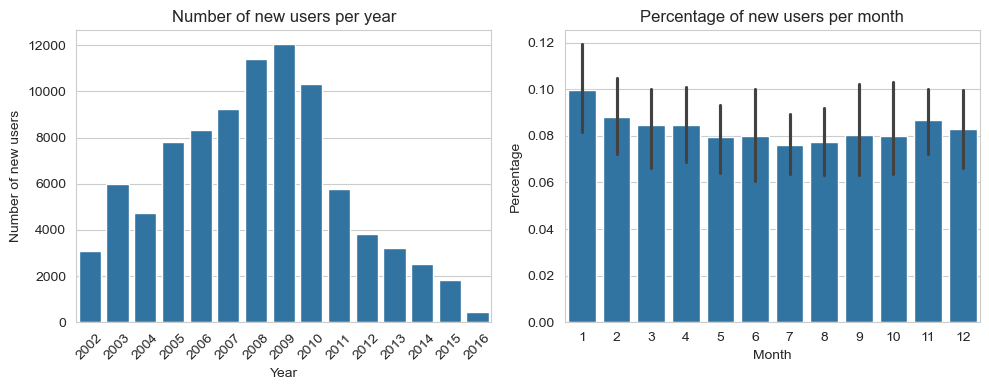

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# show the number of new users per year
sns.barplot(x='user_joined_year', y='nbr_new_users', data=df_new_users, ax=axes[0], errorbar=None)
axes[0].set_title('Number of new users per year')
axes[0].set_xlabel('Year')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Number of new users')

# show the percentage of new users per month
sns.barplot(x='user_joined_month', y='percentage', data=df_new_users, ax=axes[1], errorbar=('ci', 95))
axes[1].set_title('Percentage of new users per month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Percentage')

plt.tight_layout()
plt.show()

In [91]:
# # show the number of new users per year using plotly.expres
# fig = px.bar(df_new_users, x='user_joined_year', y='nbr_new_users', title='Number of new users per year')
# fig.update_layout(title_text='Number of new users per year')
# fig.update_yaxes(title_text='Number of new users')
# fig.update_xaxes(title_text='Year')
# fig.update_xaxes(tickmode='linear')
# fig.show()

# # export the figure as html
# # fig.write_html("figures/number_new_users_year.html")

In [92]:
# # show the percentage of new users per month using plotly.expres
# fig = px.bar(df_new_users, x='user_joined_month', y='percentage', title='Percentage of new users per month')
# fig.update_layout(title_text='Percentage of new users per month')
# fig.update_yaxes(title_text='Percentage of new users')
# fig.update_xaxes(title_text='Month')
# fig.update_xaxes(tickmode='linear')
# fig.show()

# # export the figure as html
# # fig.write_html("figures/percentage_new_users_month.html")

> As we can see, the popularity of the website had indeed gone down since 2011 where the number of reviews was already decreasing. The number of new users is quite constant over the months. 

### 4.2 Geographical Analysis 🌎 <a id='4_2-geographical-analysis'></a>

In [93]:
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')

In [94]:
# remove reviews with unknown location
df = df[df['user_country'] != 'Unknown'].copy(deep=True)
display(df.sample(3))
print('Shape of df:', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_avg_rating,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,beer_id_std_rating,serving_type_rulebased,polarity,user_filtered_nbr_reviews,beer_id_filtered_nbr_reviews,beer_id_filtered_avg_appearance,beer_id_filtered_avg_aroma,beer_id_filtered_avg_palate,beer_id_filtered_avg_taste,beer_id_filtered_avg_overall,beer_id_filtered_avg_rating,beer_id_filtered_std_appearance,beer_id_filtered_std_aroma,beer_id_filtered_std_palate,beer_id_filtered_std_taste,beer_id_filtered_std_overall,beer_id_filtered_std_rating,user_country,user_subregion,user_US_state,beer_group
299927,50671,140,Vienna Lager,1468231200,mklmcgrew.982488,4.0,3.75,3.75,3.75,3.75,3.77,12 oz bottle into a pint glass.L: Po...,853,183,3.84,5.3,115,59,1.430647e+09,"United States, California",574,3.852362,3.716535,3.858268,3.887795,3.858268,3.838110,0.358229,0.358239,0.366762,0.393030,0.345881,0.302129,bottle,0.110791,49,50,3.840000,3.750000,3.890000,3.840000,3.835000,3.824600,0.297781,0.346263,0.410823,0.467734,0.386672,0.329745,United States of America,Northern America,California,Lagers
415263,33394,700,Pumpkin Ale,1287223200,screamforme.233276,4.0,4.50,4.50,4.50,4.50,4.47,I finally had a chance to try this m...,685,190,4.14,8.1,298,75,1.215511e+09,"United States, Washington",245,3.905405,4.285135,4.014865,4.152703,4.122973,4.150703,0.428880,0.459777,0.413900,0.525821,0.453038,0.386510,draft,0.294444,44,91,3.936813,4.307692,4.027473,4.195055,4.151099,4.181648,0.384768,0.458071,0.391668,0.507995,0.442341,0.376679,United States of America,Northern America,Washington,Specialty and Unique Beers
987183,75151,18823,American Wild Ale,1321354800,mora2000.164611,4.0,3.00,4.00,3.00,3.50,3.26,On tap at the brewpub shortly after ...,5,2,3.65,6.2,3247,3247,1.192183e+09,"United States, Texas",234,4.250000,3.500000,3.750000,3.250000,3.750000,3.520000,0.353553,0.707107,0.353553,0.353553,0.353553,0.367696,draft,0.012939,2053,1,4.000000,3.000000,4.000000,3.000000,3.500000,3.260000,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,Northern America,Texas,Ales


Shape of df: (1098668, 53)


#### 4.2.1 World Region Analysis

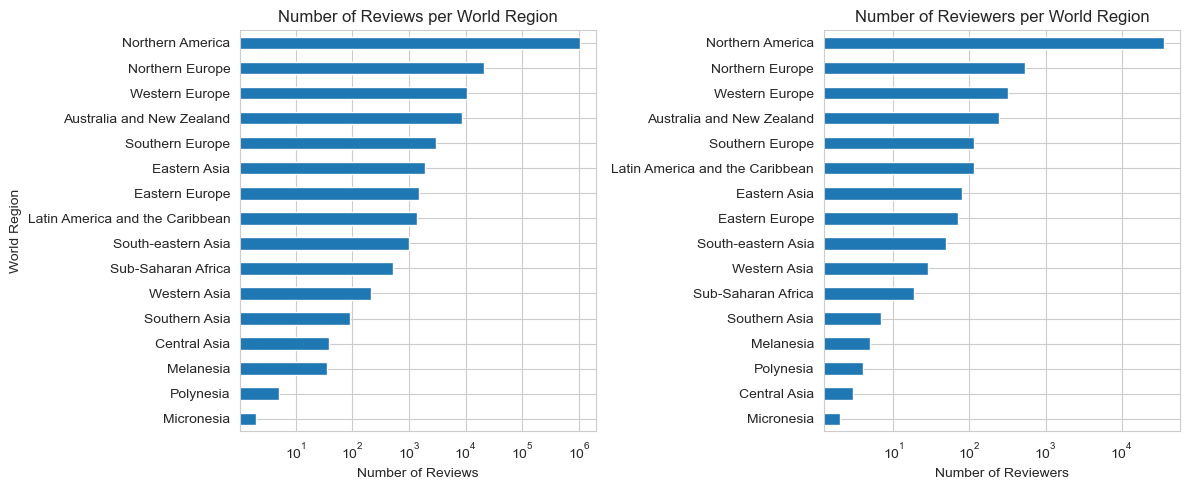

In [95]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the number of reviews per world region
df.user_subregion.value_counts().sort_values().plot(kind='barh', ax=ax1)
ax1.set_xlabel('Number of Reviews')
ax1.set_ylabel('World Region')
ax1.set_title('Number of Reviews per World Region')
ax1.set_xscale('log')

# Plot the number of reviewers per world region
df.groupby('user_subregion')['user_id'].nunique().sort_values().plot(kind='barh', ax=ax2)
ax2.set_xlabel('Number of Reviewers')
ax2.set_ylabel('')  # Hide the y-label
ax2.set_title('Number of Reviewers per World Region')
ax2.set_xscale('log')

plt.tight_layout()
plt.show()

#### 4.2.2 US State Analysis

In [96]:
# keep only reviews with user_US_state not null
df = df[df['user_US_state'].notna()].copy(deep=True)
display(df.sample(3))
print('Shape of df:', df.shape)

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_avg_rating,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,beer_id_std_rating,serving_type_rulebased,polarity,user_filtered_nbr_reviews,beer_id_filtered_nbr_reviews,beer_id_filtered_avg_appearance,beer_id_filtered_avg_aroma,beer_id_filtered_avg_palate,beer_id_filtered_avg_taste,beer_id_filtered_avg_overall,beer_id_filtered_avg_rating,beer_id_filtered_std_appearance,beer_id_filtered_std_aroma,beer_id_filtered_std_palate,beer_id_filtered_std_taste,beer_id_filtered_std_overall,beer_id_filtered_std_rating,user_country,user_subregion,user_US_state,beer_group
701106,4941,1762,American Pale Ale (APA),1172660400,maltygoodness.17215,3.5,2.00,3.00,3.0,3.00,2.79,12oz. bottlePours a slightly hazed g...,111,79,3.65,5.5,764,764,1.112350e+09,"United States, Virginia",28,3.721519,3.582278,3.693038,3.699367,3.813291,3.695063,0.451116,0.557181,0.478629,0.555248,0.593053,0.462435,bottle,0.147778,736,33,3.750000,3.515152,3.712121,3.742424,3.833333,3.703939,0.390312,0.548219,0.484612,0.550159,0.623957,0.471102,United States of America,Northern America,Pennsylvania,Ales
740947,1587,64,Herbed / Spiced Beer,1426071600,vlaminck.673317,4.0,2.75,2.75,2.5,2.75,2.73,Bought this on a whim as my wife was...,4818,1653,3.73,9.0,532,19,1.334916e+09,"United States, Delaware",378,3.689744,3.746500,3.724893,3.775715,3.591601,3.721923,0.524468,0.578975,0.576000,0.642215,0.683497,0.511238,bottle,0.108222,11,625,3.680000,3.723600,3.722800,3.726800,3.535600,3.684864,0.499599,0.590475,0.572000,0.632219,0.677027,0.508300,United States of America,Northern America,California,Specialty and Unique Beers
680642,9478,26,American Pale Wheat Ale,1162551600,pbr85.20202,3.5,4.50,3.50,4.0,4.00,4.04,"Shared a bomber with jslot, paired i...",5828,1558,4.21,5.6,81,81,1.117015e+09,"United States, Indiana",333,3.977932,4.215851,4.088756,4.233892,4.341495,4.221591,0.438373,0.460962,0.455790,0.478737,0.473258,0.371901,bottle,0.190625,45,706,3.971671,4.210340,4.088173,4.231941,4.345609,4.219816,0.443325,0.472115,0.458874,0.494949,0.474598,0.384165,United States of America,Northern America,New York,Wheat Beers


Shape of df: (984769, 53)


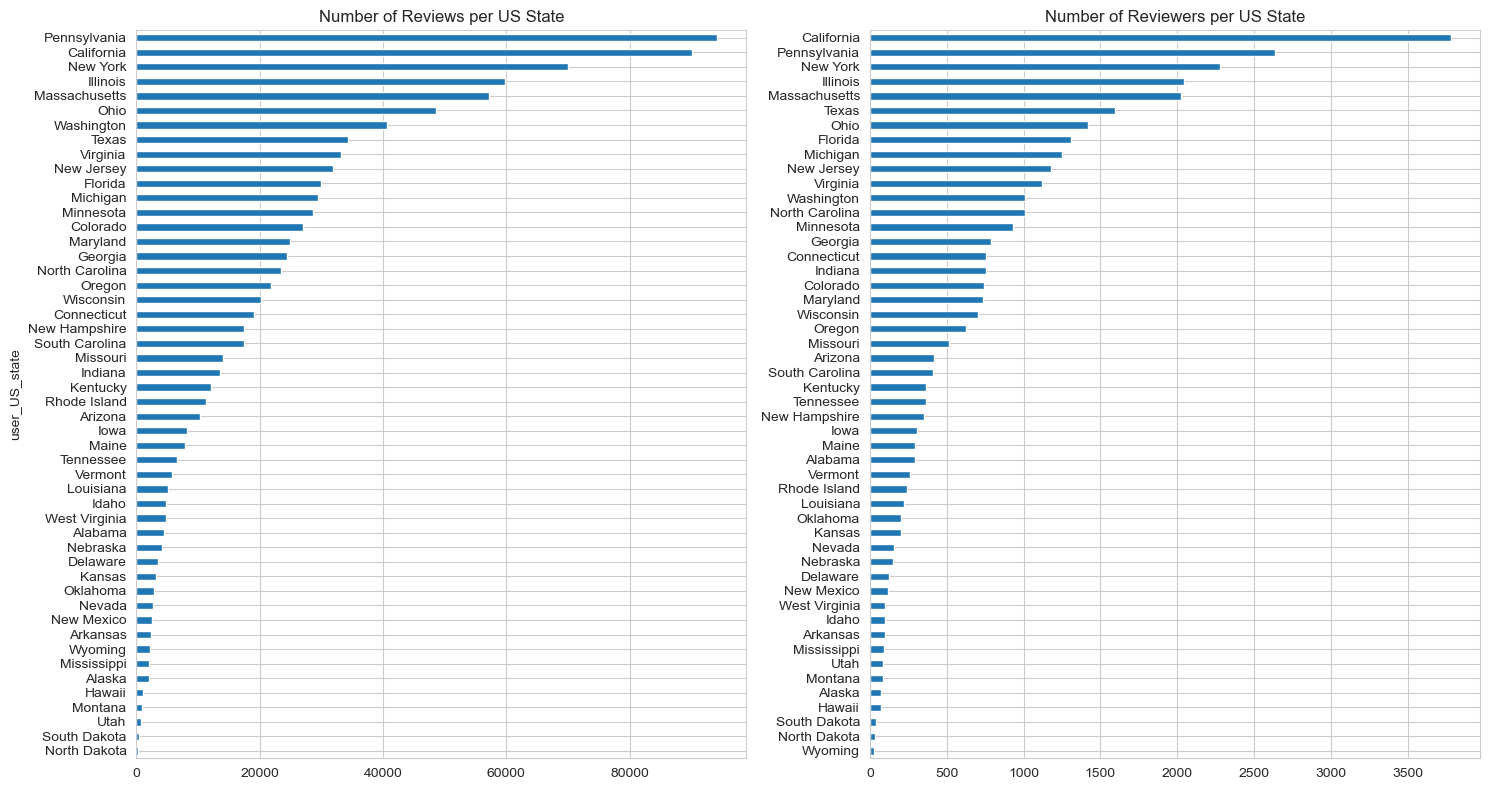

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Number of reviews per US state
df.user_US_state.value_counts().sort_values().plot(kind='barh', ax=ax1)
ax1.set_title('Number of Reviews per US State')

# Number of reviewers per US state
df.groupby('user_US_state')['user_id'].nunique().sort_values().plot(kind='barh', ax=ax2)
ax2.set_title('Number of Reviewers per US State')
ax2.set_ylabel('')  # Hide the y-label

plt.tight_layout()
plt.show()

### 4.3 Beer Style Analysis 🍻 <a id='4_3-beer-style-analysis'></a>

In [98]:
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')

> We want to see how the serving styles are distributed among the different beer groups. A statistical analysis will be performed to see if the serving style is dependent on the beer group. 

> Moreover, we also would like to see if the serving style is dependent on the user subregion. 

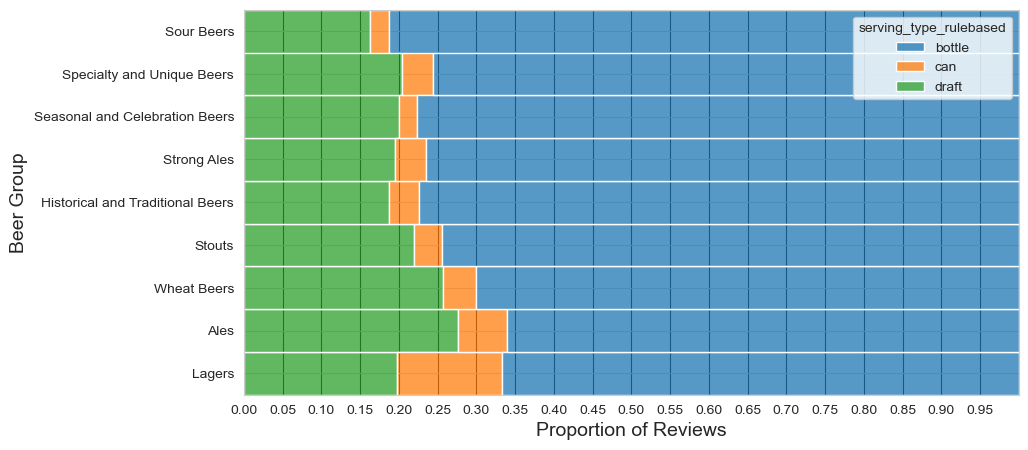

In [99]:
# Show the distribution of serving types among beer groups normalized 
order_type = ['bottle', 'can', 'draft']
plt.figure(figsize=(10, 5))
sns.histplot(data=df, y='beer_group', hue='serving_type_rulebased', multiple='fill', hue_order=order_type)
plt.xlabel('Proportion of Reviews', fontsize=14)
plt.ylabel('Beer Group', fontsize=14)
# add vertical lines
plt.grid(axis='x', linewidth=0.8, color='black')
plt.xticks(np.arange(0, 1, 0.05))
plt.gca().invert_yaxis()
#plt.savefig('figures/serving_type_beer_group.png', dpi=300, bbox_inches='tight')
plt.show()

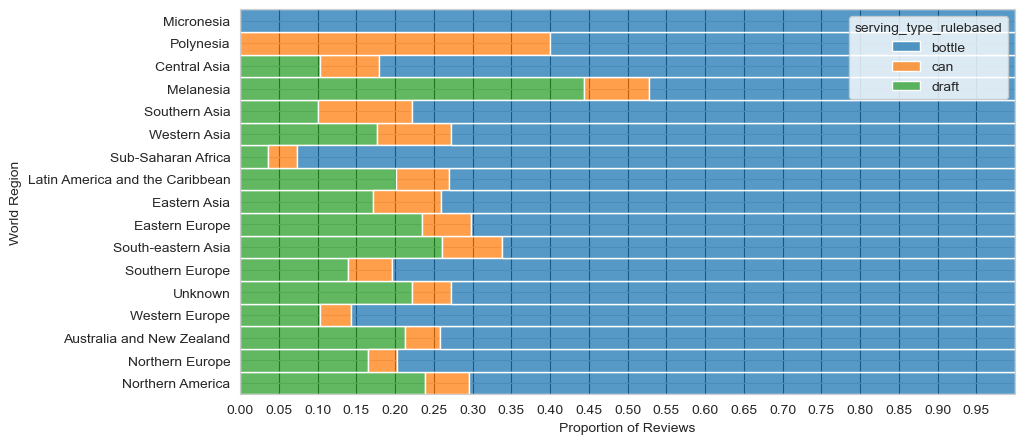

In [100]:
# show the distribution of serving types among world regions normalized
plt.figure(figsize=(10, 5))
sns.histplot(data=df, y='user_subregion', hue='serving_type_rulebased', multiple='fill', hue_order=order_type)
plt.xlabel('Proportion of Reviews')
plt.ylabel('World Region')
# add vertical lines
plt.grid(axis='x', linewidth=0.8, color='black')
plt.xticks(np.arange(0, 1, 0.05))
plt.gca().invert_yaxis()
#plt.savefig('figures/serving_type_world_region.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Statistical Analysis 📈 <a id='5-statistical-analysis'></a>

In [101]:
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')

### 5.0 First Understanding of the rating aspects

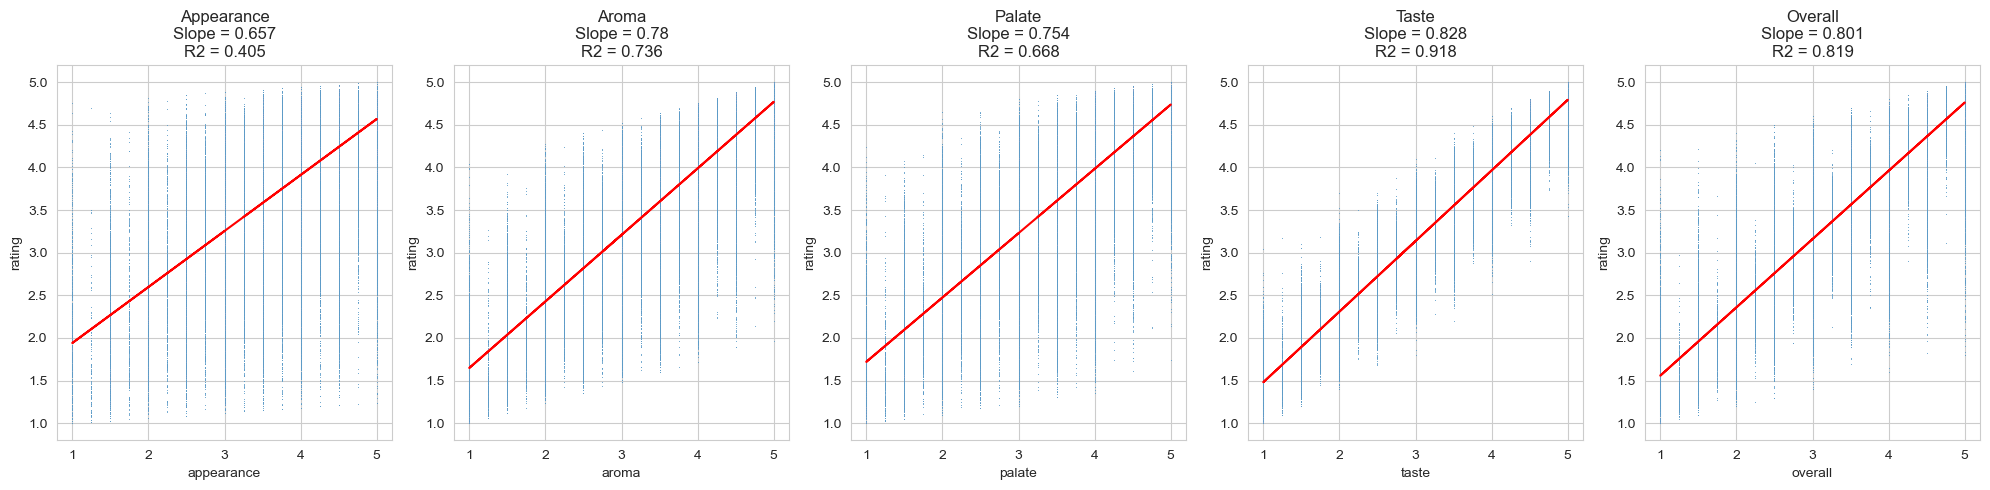

In [102]:
# fit a linear regression line to the data for all 5 aspects
reg1 = LinearRegression().fit(df[['appearance']], df['rating'])
reg2 = LinearRegression().fit(df[['aroma']], df['rating'])
reg3 = LinearRegression().fit(df[['palate']], df['rating'])
reg4 = LinearRegression().fit(df[['taste']], df['rating'])
reg5 = LinearRegression().fit(df[['overall']], df['rating'])

# create subplots for all 5 aspects
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# plot the data and regression line for each aspect
sns.scatterplot(data=df, x='appearance', y='rating', s=0.5, ax=axs[0])
axs[0].plot(df[['appearance']], reg1.predict(df[['appearance']]), color='red')
axs[0].set_title('Appearance\nSlope = ' + str(round(reg1.coef_[0], 3)) + '\nR2 = ' + str(round(reg1.score(df[['appearance']], df['rating']), 3)))

sns.scatterplot(data=df, x='aroma', y='rating', s=0.5, ax=axs[1])
axs[1].plot(df[['aroma']], reg2.predict(df[['aroma']]), color='red')
axs[1].set_title('Aroma\nSlope = ' + str(round(reg2.coef_[0], 3)) + '\nR2 = ' + str(round(reg2.score(df[['aroma']], df['rating']), 3)))

sns.scatterplot(data=df, x='palate', y='rating', s=0.5, ax=axs[2])
axs[2].plot(df[['palate']], reg3.predict(df[['palate']]), color='red')
axs[2].set_title('Palate\nSlope = ' + str(round(reg3.coef_[0], 3)) + '\nR2 = ' + str(round(reg3.score(df[['palate']], df['rating']), 3)))

sns.scatterplot(data=df, x='taste', y='rating', s=0.5, ax=axs[3])
axs[3].plot(df[['taste']], reg4.predict(df[['taste']]), color='red')
axs[3].set_title('Taste\nSlope = ' + str(round(reg4.coef_[0], 3)) + '\nR2 = ' + str(round(reg4.score(df[['taste']], df['rating']), 3)))

sns.scatterplot(data=df, x='overall', y='rating', s=0.5, ax=axs[4])
axs[4].plot(df[['overall']], reg5.predict(df[['overall']]), color='red')
axs[4].set_title('Overall\nSlope = ' + str(round(reg5.coef_[0], 3)) + '\nR2 = ' + str(round(reg5.score(df[['overall']], df['rating']), 3)))

plt.tight_layout()
plt.show()

> It seems like Taste as the biggest impact on the rating while appearance has the least impact.

### 5.1 Does the serving style influence the ratings ?

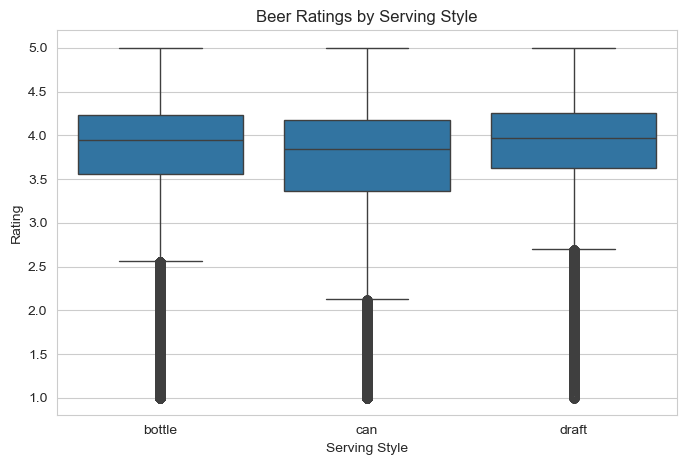

In [103]:
# do a box plot for the ratings depending on the serving style : bottle first, then can and finally draft
serving_type_order = ['bottle', 'can', 'draft']
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, y='rating', x='serving_type_rulebased', order=serving_type_order)
plt.title('Beer Ratings by Serving Style')
plt.xlabel('Serving Style')
plt.ylabel('Rating')
plt.show()

In [104]:
# # Define serving type order
# serving_type_order = ['bottle', 'can', 'draft']

# # Create a box plot with Plotly Express
# fig = px.box(df, x='serving_type_rulebased', y='rating', category_orders={'serving_type_rulebased': serving_type_order},
#              color='serving_type_rulebased', color_discrete_map={'bottle': 'blue', 'can': 'orange', 'draft': 'green'})

# # Update layout
# fig.update_layout(
#     title='Beer Ratings by Serving Style',
#     xaxis_title='Serving Style',
#     yaxis_title='Rating',
# )

# # Save the plot as an HTML file
# fig.write_html('beer_ratings_by_serving_style.html')


# # Show the plot
# fig.show()

In [105]:
# # Define columns and serving types
# columns = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']
# serving_types = ['bottle', 'can', 'draft']  # Assuming these are the possible serving types

# # Specify colors for each serving type
# line_colors = {'bottle': 'blue', 'can': 'orange', 'draft': 'green'}

# # Create a radar chart
# fig = go.Figure()

# # Add traces for each serving type
# for serving_type in serving_types:
#     data_subset = df[df['serving_type_rulebased'] == serving_type]
    
#     # Calculate mean ratings and standard errors
#     mean_ratings = data_subset[columns].mean()
#     std_errors = data_subset[columns].sem()  # Assuming you want standard errors
    
#     # Plot the mean ratings
#     fig.add_trace(go.Scatterpolar(
#         r=mean_ratings.values,
#         theta=tuple(columns),  # Convert columns to tuple
#         mode='markers+lines',
#         name=serving_type,
#         line=dict(color=line_colors[serving_type], width=2),  # Set line color
#     ))

#     # Plot the confidence interval as a filled line
#     upper_bound = mean_ratings + 1.96 * std_errors
#     lower_bound = mean_ratings - 1.96 * std_errors
#     confidence_interval = pd.concat([upper_bound, lower_bound[::-1]])  # Concatenate in reverse order for a closed loop
#     fig.add_trace(go.Scatterpolar(
#         r=confidence_interval.values,
#         theta=tuple(columns) + tuple(columns[::-1]),  # Convert columns and reverse to tuple
#         fill='toself',  # Fill the area between the upper and lower bounds
#         fillcolor=line_colors[serving_type],  # Set fill color with lower opacity
#         line=dict(color='rgba(255,255,255,0)'),  # Set line color to transparent
#         hoverinfo='skip',  # Skip hoverinfo for the filled area
#         showlegend=True,  # Do not show legend for the filled area
#     ))

# # Update layout
# fig.update_layout(
#     polar=dict(
#         radialaxis=dict(visible=True, range=[3.5, 4]),  # Set the radial axis range
#     ),
#     showlegend=True,
#     title='Mean Ratings for Different Aspects by Serving Type (Radar Chart)',
# )

# # Show the plot
# fig.write_html('plots/radar_plot_aspect_serving.html')
# fig.show()

In [106]:
from scipy.stats import f_oneway
# define the columns to compare
aspects = ['aroma', 'appearance', 'palate', 'taste', 'overall', 'rating', 'polarity']

# compare each column for each serving style using f_oneway
for aspect in aspects:
    result = f_oneway(df[df['serving_type_rulebased'] == 'bottle'][aspect],
                          df[df['serving_type_rulebased'] == 'can'][aspect],
                          df[df['serving_type_rulebased'] == 'draft'][aspect])
    
    print(f"{aspect} - p-value: {result.pvalue:.4f}")

aroma - p-value: 0.0000
appearance - p-value: 0.0000
palate - p-value: 0.0000
taste - p-value: 0.0000
overall - p-value: 0.0000
rating - p-value: 0.0000
polarity - p-value: 0.0000


> At least one of the serving styles has a different mean rating. By comparing each aspect between serving styles two by two we could evaluate if only one serving style is different

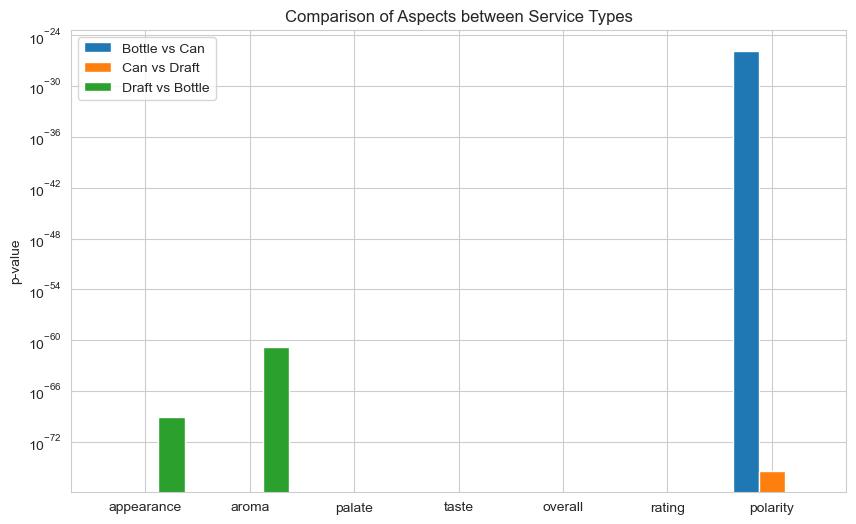

In [107]:
# compare each aspect between all three serving types

# define the columns to compare
columns = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating', 'polarity']

# create an empty matrix to store the p-values
p_values = np.zeros((len(columns), 3))

# perform the t-test and store the p-values in the matrix
for i in range(len(columns)):
    ttest1 = ttest_ind(df[df['serving_type_rulebased'] == 'bottle'][columns[i]], df[df['serving_type_rulebased'] == 'can'][columns[i]])
    ttest2 = ttest_ind(df[df['serving_type_rulebased'] == 'can'][columns[i]], df[df['serving_type_rulebased'] == 'draft'][columns[i]])
    ttest3 = ttest_ind(df[df['serving_type_rulebased'] == 'draft'][columns[i]], df[df['serving_type_rulebased'] == 'bottle'][columns[i]])
    p_values[i][0] = ttest1[1]
    p_values[i][1] = ttest2[1]
    p_values[i][2] = ttest3[1]

# create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(columns))
width = 0.25
rects1 = ax.bar(x - width, p_values[:,0], width, label='Bottle vs Can')
rects2 = ax.bar(x, p_values[:,1], width, label='Can vs Draft')
rects3 = ax.bar(x + width, p_values[:,2], width, label='Draft vs Bottle')
ax.set_xticks(x)
ax.set_yscale('log')
ax.set_xticklabels(columns)
ax.set_ylabel('p-value')
ax.set_title('Comparison of Aspects between Service Types')
ax.legend()
plt.show()

> The distributions of the different aspects are different between each serving style. This would mean that the serving style has an influence on the ratings. However, we cannot conclude anything yet, we need to make sure that this difference really comes from the serving style and not from another aspect, such as the beer group. 

In [108]:
# # Histogram of the ratings for each serving type
# plt.subplots(figsize=(24, 8))
# plt.subplot(231)
# sns.histplot(data=df, hue='serving_type_rulebased', x='aroma', binwidth=0.5)
# plt.ylim(0, 400000)
# plt.subplot(232)
# sns.histplot(data=df, hue='serving_type_rulebased', x='taste', binwidth=0.5)
# plt.ylim(0, 400000)
# plt.subplot(233)
# sns.histplot(data=df, hue='serving_type_rulebased', x='palate', binwidth=0.5)
# plt.ylim(0, 400000)
# plt.subplot(234)
# sns.histplot(data=df, hue='serving_type_rulebased', x='appearance', binwidth=0.5)
# plt.ylim(0, 400000)
# plt.subplot(235)
# sns.histplot(data=df, hue='serving_type_rulebased', x='overall', binwidth=0.5)
# plt.ylim(0, 400000)
# plt.subplot(236)
# sns.histplot(data=df, hue='serving_type_rulebased', x='polarity', binwidth=0.5)
# plt.ylim(0, 400000)
# plt.tight_layout()
# plt.show()

In [109]:
# # Set up subplots
# fig = make_subplots(rows=1, cols=5, subplot_titles=['Aroma', 'Taste', 'Palate', 'Appearance', 'Overall'], shared_yaxes=True)

# # Define order and colors
# serving_order = ['bottle', 'can', 'draft']
# colors = ['#1f78b4', '#ff7f00', '#33a02c']  # Blue, Orange, Green

# # Plot each histogram
# for i, aspect in enumerate(['aroma', 'taste', 'palate', 'appearance', 'overall']):
#     for j, serving_type in enumerate(serving_order):
#         subset_df = df[df['serving_type_rulebased'] == serving_type]
#         fig.add_trace(
#             px.histogram(subset_df, x=aspect, color='serving_type_rulebased', nbins=20, color_discrete_sequence=[colors[j]]).update_traces(opacity=0.7).data[0],
#             row=1 , col=i+1
#         )

# # Update layout
# fig.update_layout(
#     height=400,
#     showlegend=False,
#     title_text='Analysis of Serving Style on Ratings and Tasting Palette',
# )

# # Show the plot
# fig.write_html('plots/BA_04_serving_style_hist.html')
# fig.show()

### 5.2 Comparison of the ratings for a subset of beers

> In order to evaluate hidden covariates, we decided to compare the ratings for a subset of beers that had a sufficient amount of reviews for each serving style. We chose to keep only the beers that had at least 10 reviews for each serving style. By comparing the distributions of ratings for those reviews only, we can evaluate if the serving style has an influence on the ratings. 

In [110]:
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')

In [111]:
# count the number of reviews for each serving type per beer
df_match = df.groupby(['beer_id', 'serving_type_rulebased']).size().unstack().reset_index()
df_match.columns = ['beer_id', 'bottle', 'can', 'draft']
df_match.fillna(0, inplace=True)
df_match[['bottle', 'can', 'draft']] = df_match[['bottle', 'can', 'draft']].astype(int)

# keep only beer that have at least n reviews for each serving type
n = 10
df_match = df_match[(df_match['bottle'] >= n) & (df_match['can'] >= n) & (df_match['draft'] >= n)].copy(deep=True)

display(df_match.sample(3))
print('Shape of df_match:', df_match.shape)
print('There are {} beers that have at least {} reviews for each serving type'.format(df_match.shape[0], n))

,beer_id,bottle,can,draft
42054,68049,23,24,10
1330,1654,18,15,35
2099,2680,98,15,12


Shape of df_match: (242, 4)
There are 242 beers that have at least 10 reviews for each serving type


In [112]:
# keep the reviews only for beers that have at least n reviews for each serving type
df = df[df['beer_id'].isin(df_match['beer_id'])].copy(deep=True)

# for each beer_id, keep only n random reviews for each serving type
df = df.groupby(['beer_id', 'serving_type_rulebased']).apply(lambda x: x.sample(n=n)).reset_index(drop=True)
display(df.sample(3))
print('Shape of df:', df.shape)
print('We have {} reviews for each beer_id, {} for each serving type'.format(3*n, n))

,beer_id,brewery_id,style,date,user_id,appearance,aroma,palate,taste,overall,rating,text,beer_nbr_ratings,beer_nbr_reviews,avg,abv,user_nbr_ratings,user_nbr_reviews,user_joined,brewery_location,brewery_nbr_beers,beer_id_avg_appearance,beer_id_avg_aroma,beer_id_avg_palate,beer_id_avg_taste,beer_id_avg_overall,beer_id_avg_rating,beer_id_std_appearance,beer_id_std_aroma,beer_id_std_palate,beer_id_std_taste,beer_id_std_overall,beer_id_std_rating,serving_type_rulebased,polarity,user_filtered_nbr_reviews,beer_id_filtered_nbr_reviews,beer_id_filtered_avg_appearance,beer_id_filtered_avg_aroma,beer_id_filtered_avg_palate,beer_id_filtered_avg_taste,beer_id_filtered_avg_overall,beer_id_filtered_avg_rating,beer_id_filtered_std_appearance,beer_id_filtered_std_aroma,beer_id_filtered_std_palate,beer_id_filtered_std_taste,beer_id_filtered_std_overall,beer_id_filtered_std_rating,user_country,user_subregion,user_US_state,beer_group
1947,1321,75,American Adjunct Lager,1495015200,puck1225.1028282,3.50,3.00,2.75,2.75,2.75,2.86,Had it on tap where the options were...,2245,586,2.87,4.4,678,676,1.439546e+09,Mexico,21,2.962435,2.652850,2.967185,2.931347,3.131261,2.910432,0.645882,0.635386,0.701428,0.716626,0.750748,0.599095,draft,0.271825,553,242,2.945248,2.592975,2.967975,2.919421,3.110537,2.886240,0.607567,0.602237,0.661835,0.703219,0.747001,0.573897,United States of America,Northern America,Texas,Lagers
6638,81067,24300,American Double / Imperial Stout,1488106800,derek.17251,4.25,4.25,4.25,4.25,4.00,4.20,"Pours a finger of tan head, but it d...",1943,380,4.27,12.0,3145,2448,1.112436e+09,"United States, New York",248,4.362398,4.195504,4.314033,4.251362,4.254768,4.253515,0.405482,0.399488,0.467145,0.467523,0.436717,0.385053,bottle,0.155729,501,156,4.357372,4.184295,4.277244,4.240385,4.232372,4.238013,0.368204,0.363797,0.493975,0.440751,0.426078,0.365106,Canada,Northern America,None,Stouts
291,219,71,Extra Special / Strong Bitter (ESB),1064743200,oldfrothingslosh.1028,4.00,4.00,4.50,4.00,4.50,4.15,On tap at Capital Ale House.Deep cop...,2946,1362,4.06,5.9,644,644,1.037358e+09,England,61,4.005178,3.912352,4.038831,4.123151,4.174926,4.067692,0.461079,0.482091,0.485513,0.503776,0.504609,0.401387,draft,0.163980,442,560,4.008482,3.923214,4.028571,4.120536,4.161607,4.065750,0.477157,0.481218,0.518733,0.531627,0.523593,0.420886,United States of America,Northern America,Pennsylvania,Ales


Shape of df: (7260, 53)
We have 30 reviews for each beer_id, 10 for each serving type


In [113]:
aspects = ['aroma', 'appearance', 'palate', 'taste', 'overall', 'rating', 'polarity']
above_threshold = []
below_threshold = []

for aspect in aspects:
    above = 0
    below = 0
    
    for beer_id in tqdm(set(df['beer_id'])):
        # Filter the DataFrame for the specified beer ID
        filtered_df_specific = df[df['beer_id'] == beer_id]

        # Perform the one-way ANOVA test
        result = f_oneway(filtered_df_specific[filtered_df_specific['serving_type_rulebased'] == 'bottle'][aspect],
                          filtered_df_specific[filtered_df_specific['serving_type_rulebased'] == 'can'][aspect],
                          filtered_df_specific[filtered_df_specific['serving_type_rulebased'] == 'draft'][aspect])

        if result.pvalue < 0.05:
            above += 1
        else:
            below += 1
    
    above_threshold.append(above)
    below_threshold.append(below)
    print(f'The percentage of beers where the {aspect} is significantly different between serving types is {round(above / (above + below) * 100, 2)}%.\n')

100%|██████████| 242/242 [00:00<00:00, 2708.57it/s]


The percentage of beers where the aroma is significantly different between serving types is 4.55%.



100%|██████████| 242/242 [00:00<00:00, 2817.30it/s]


The percentage of beers where the appearance is significantly different between serving types is 4.96%.



100%|██████████| 242/242 [00:00<00:00, 2718.64it/s]


The percentage of beers where the palate is significantly different between serving types is 7.02%.



100%|██████████| 242/242 [00:00<00:00, 2726.45it/s]


The percentage of beers where the taste is significantly different between serving types is 4.55%.



100%|██████████| 242/242 [00:00<00:00, 2592.20it/s]


The percentage of beers where the overall is significantly different between serving types is 5.79%.



100%|██████████| 242/242 [00:00<00:00, 2688.03it/s]


The percentage of beers where the rating is significantly different between serving types is 4.13%.



100%|██████████| 242/242 [00:00<00:00, 2625.90it/s]

The percentage of beers where the polarity is significantly different between serving types is 7.02%.



> Only a small amount of beers (5 to 8%) have different ratings for different serving styles. It seems like the serving type is not the only factor that influences the ratings !

### 5.3 Is the serving style dependent on the beer group ?

In [114]:
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')

In [115]:
# perform a statistical test to see if the serving type is dependent on the beer group

# create a contingency table
contingency_table = pd.crosstab(df['beer_group'], df['serving_type_rulebased'])
display(contingency_table)

# perform the chi2 test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi2 Stat:', chi2_stat)
print('P-Value:', p_value)

if p_value < 0.05:
    print('The serving type is dependent on the beer group.')
else:
    print('The serving type is independent of the beer group.')

serving_type_rulebased,bottle,can,draft
beer_group,,,
Ales,301094,29159,125932
Historical and Traditional Beers,26610,1318,6449
Lagers,69312,14029,20562
Seasonal and Celebration Beers,25123,753,6460
Sour Beers,22482,669,4503
Specialty and Unique Beers,38979,2072,10551
Stouts,113055,5453,33432
Strong Ales,166048,8610,42502
Wheat Beers,43747,2609,16061


Chi2 Stat: 26674.999474138986
P-Value: 0.0
The serving type is dependent on the beer group.


In [116]:
def cramers_v(contingency_table):
    """
    Calculate Cramer's V statistic for categorical-categorical association.
    """
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [117]:
# compute the strength of the association between the two variables
cramers_v_value = cramers_v(contingency_table)
print('Cramér\'s V:', cramers_v_value)

Cramér's V: 0.10824740108574835


> The serving style is dependent of the beer group. This relationship is not very strong, but it is still significant.

### 5.4 For each beer group, do the ratings depend on the serving style ?

In [118]:
df = pd.read_parquet(dataset_path + 'BA_04_complete.parquet')

In [119]:
# in df beer_group, change the entries to remove ' ' and replace with '_'
df['beer_group'] = df['beer_group'].str.replace(' ', '_')

<blockquote>
So, we want to know if the ratings are different for each beer beer group. We will perform a one-way ANOVA test for each beer group. The null hypothesis is that the ratings are the same for each serving style. The alternative hypothesis is that the ratings are different for at least one serving style.
</blockquote>

In [120]:
beer_groups = ['Ales', 'Lagers', 'Stouts', 'Wheat_Beers', 'Specialty_and_Unique_Beers', 'Seasonal_and_Celebration_Beers', 'Historical_and_Traditional_Beers', 'Sour_Beers']

# ANOVA
f_statistic, p_value = f_oneway(*[df['rating'][df['beer_group'] == group] for group in beer_groups])

print("P-value:", p_value)

P-value: 0.0


<blockquote>

<b> ANOVA: </b>
- Null Hypothesis (H0): The means of ratings are equal across all beer styles.
- Alternative Hypothesis (H1): At least one mean is different.

From our results, we can reject the null hypothesis and conclude that the means of ratings are not equal across all beer styles!
So the beer group is an important cofounder of the beer rating.

<blockquote>


In [121]:
# for better readability, df for each serving type
df_can = df[df['serving_type_rulebased'] == 'can']
df_bottle = df[df['serving_type_rulebased'] == 'bottle']
df_draft = df[df['serving_type_rulebased'] == 'draft']

In [122]:
# when we look at the number of reviews per beer group, some groups have a lot more reviews than others
# in order to have a fair comparison, we will only keep the beer groups that have the least number of reviews
min_counts_dict = {group: min(df_can['beer_group'].value_counts()[group], df_bottle['beer_group'].value_counts()[group], df_draft['beer_group'].value_counts()[group]) for group in beer_groups}

for group in min_counts_dict:
    print(f'The minimum number of reviews for {group} is {min_counts_dict[group]}')

The minimum number of reviews for Ales is 29159
The minimum number of reviews for Lagers is 14029
The minimum number of reviews for Stouts is 5453
The minimum number of reviews for Wheat_Beers is 2609
The minimum number of reviews for Specialty_and_Unique_Beers is 2072
The minimum number of reviews for Seasonal_and_Celebration_Beers is 753
The minimum number of reviews for Historical_and_Traditional_Beers is 1318
The minimum number of reviews for Sour_Beers is 669


In [123]:
# two methods to create df for each group
# if sample_size is not specified, we keep all the reviews for each group
# otherwise, we sample n reviews for each group, making sure the same amount of reviews is kept
dfs = {}

for group in beer_groups:
    #sample_size = min_counts_dict[group]
    sample_size = None
    
    if sample_size is None:
        df_can_group = df_can[df_can['beer_group'] == group]
        df_bottle_group = df_bottle[df_bottle['beer_group'] == group]
        df_draft_group = df_draft[df_draft['beer_group'] == group]
    else:
        df_can_group = df_can[df_can['beer_group'] == group].sample(n=sample_size)
        df_bottle_group = df_bottle[df_bottle['beer_group'] == group].sample(n=sample_size)
        df_draft_group = df_draft[df_draft['beer_group'] == group].sample(n=sample_size)

    dfs[f'df_can_{group}'] = df_can_group
    dfs[f'df_bottle_{group}'] = df_bottle_group
    dfs[f'df_draft_{group}'] = df_draft_group

# concatenate df_can df_bottle and df_draft for each group    
concatenated_dfs = {}

for group in beer_groups:
    df_can_group = dfs[f'df_can_{group}']
    df_bottle_group = dfs[f'df_bottle_{group}']
    df_draft_group = dfs[f'df_draft_{group}']

    concatenated_dfs[f'df_{group.lower()}'] = pd.concat([df_can_group, df_bottle_group, df_draft_group])

In [124]:
# Create dummy variables for serving_style and beer_group
for group in beer_groups:
    df_group = concatenated_dfs[f'df_{group.lower()}']
    df_group = pd.get_dummies(df_group, columns=['serving_type_rulebased'], drop_first=True)
    concatenated_dfs[f'df_{group.lower()}'] = df_group

In [125]:
# retrieve the df for each group
df_ales = concatenated_dfs['df_ales']
df_lagers = concatenated_dfs['df_lagers']
df_stouts = concatenated_dfs['df_stouts']
df_wheat_beers = concatenated_dfs['df_wheat_beers']
df_specialty_and_unique_beers = concatenated_dfs['df_specialty_and_unique_beers']
df_seasonal_and_celebration_beers = concatenated_dfs['df_seasonal_and_celebration_beers']
df_historical_and_traditional_beers = concatenated_dfs['df_historical_and_traditional_beers']
df_sour_beers = concatenated_dfs['df_sour_beers']

<blockquote>

Now, our goal is to analyse the difference between ratings for each serving style taking into account the beer group. 
To do so, we will use a ordinary least squares (OLS) regression model depending on the serving style PER beer group.

</blockquote>


In [126]:
# Model: rating ~ serving_style_can + serving_style_draft + beer_group_Lagers + ...
model_ales = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_ales).fit()
model_lagers = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_lagers).fit()
model_stouts = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_stouts).fit()
model_wheat = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_wheat_beers).fit()
model_specialty = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_specialty_and_unique_beers).fit()
model_seasonal = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_seasonal_and_celebration_beers).fit()
model_historical = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_historical_and_traditional_beers).fit()
model_sour = smf.ols(formula='rating ~ serving_type_rulebased_draft + serving_type_rulebased_can', data=df_sour_beers).fit()

# Print the summary of the model
print(model_ales.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     382.4
Date:                Fri, 22 Dec 2023   Prob (F-statistic):          1.12e-166
Time:                        17:32:50   Log-Likelihood:            -3.5073e+05
No. Observations:              456185   AIC:                         7.015e+05
Df Residuals:                  456182   BIC:                         7.015e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [127]:
models = [model_ales, model_lagers, model_stouts, model_wheat, model_specialty, model_seasonal, model_historical, model_sour]
model_names = ['Ales', 'Lagers', 'Stouts', 'Wheat', 'Specialty', 'Seasonal', 'Historical', 'Sour']

# Initialize lists to store values
intercept, draft, can, intercept_p, draft_p, can_p, intercept_se, draft_se, can_se = ([] for _ in range(9))

# Loop through models and extract values
for model in models:
    intercept.append(model.params.iloc[0])
    draft.append(model.params.iloc[1])
    can.append(model.params.iloc[2])

    intercept_p.append(model.pvalues.iloc[0])
    draft_p.append(model.pvalues.iloc[1])
    can_p.append(model.pvalues.iloc[2])

    intercept_se.append(model.bse.iloc[0])
    draft_se.append(model.bse.iloc[1])
    can_se.append(model.bse.iloc[2])

df_models = pd.DataFrame({
    'intercept': intercept, 'draft': draft, 'can': can,
    'intercept_p': intercept_p, 'draft_p': draft_p, 'can_p': can_p,
    'intercept_se': intercept_se, 'draft_se': draft_se, 'can_se': can_se
}, index=model_names)

display(df_models)

,intercept,draft,can,intercept_p,draft_p,can_p,intercept_se,draft_se,can_se
Ales,3.833210,0.048355,0.008871,0.0,1.379711e-167,5.592186e-03,0.000951,0.001752,0.003201
Lagers,3.313690,0.225944,-0.312284,0.0,0.000000e+00,0.000000e+00,0.002792,0.005837,0.006805
Stouts,4.039578,0.025381,-0.055148,0.0,2.501268e-14,1.038073e-13,0.001591,0.003330,0.007416
Wheat,3.730723,0.050602,-0.082402,0.0,3.354895e-22,5.034449e-13,0.002705,0.005221,0.011404
Specialty,3.574541,0.158824,-0.312751,0.0,3.587765e-100,3.192064e-92,0.003443,0.007459,0.015324
Seasonal,3.770330,0.018053,-0.145203,0.0,1.531335e-02,1.924255e-13,0.003367,0.007444,0.019737
Historical,3.899660,0.016589,-0.130024,0.0,2.052768e-02,4.426159e-19,0.003163,0.007161,0.014559
Sour,4.040671,-0.020711,-0.154393,0.0,1.621109e-02,9.005252e-14,0.003519,0.008614,0.020700


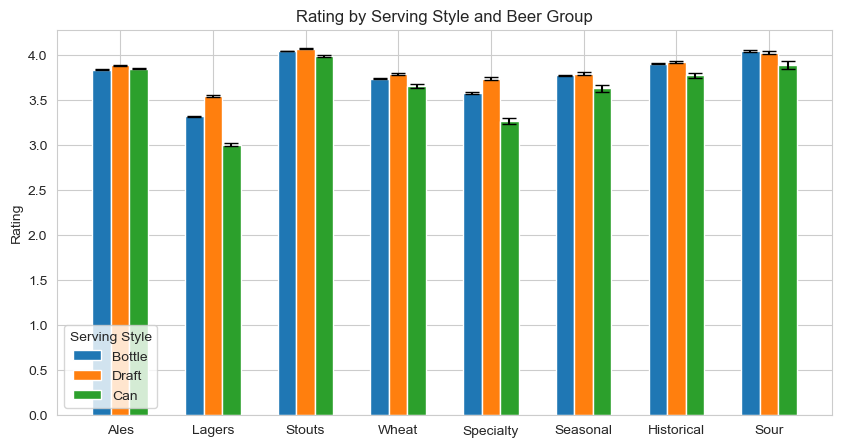

In [128]:
# plot the results with confidence intervals!
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(df_models))
width = 0.2

# Plotting bars with labels and error bars
ax.bar(x - width, df_models['intercept'], width, label='Bottle', yerr=1.96 * df_models['intercept_se'], capsize=5)
ax.bar(x, df_models['intercept'] + df_models['draft'], width, label='Draft', yerr=1.96 * df_models['draft_se'], capsize=5)
ax.bar(x + width, df_models['intercept'] + df_models['can'], width, label='Can', yerr=1.96 * df_models['can_se'], capsize=5)

# Setting labels and title
ax.set_ylabel('Rating')
ax.set_title('Rating by Serving Style and Beer Group')
ax.set_xticks(x)
ax.set_xticklabels(df_models.index)

# Adding legend with a title
ax.legend(title='Serving Style')

# Show the plot
plt.show()

<blockquote>

<b> Interesting results ! </b>

Our intuition was correct, most of the time drafts have higher ratings than bottles and cans. Except once for Sour beers! 
Can have the lowest ratings for all beer groups except for Ales. The complexity of the taste of Ales seem to be better preserved in cans than in bottles.

Moreover, we can see that Lagers, are not as appreciated as other beer groups. It makes sense since it is a beer meant to be drunk fast and cold. It is not meant to be savoured.

</blockquote>


In [129]:
# # Create figure
# fig = go.Figure()

# # Plotting bars with labels and error bars
# fig.add_trace(go.Bar(
#     x=df_models.index,
#     y=df_models['intercept'],
#     name='Bottle',
#     error_y=dict(type='data', array=1.96 * df_models['intercept_se'], visible=True),
# ))

# fig.add_trace(go.Bar(
#     x=df_models.index,
#     y=df_models['intercept'] + df_models['draft'],
#     name='Draft',
#     error_y=dict(type='data', array=1.96 * df_models['draft_se'], visible=True),
# ))

# fig.add_trace(go.Bar(
#     x=df_models.index,
#     y=df_models['intercept'] + df_models['can'],
#     name='Can',
#     error_y=dict(type='data', array=1.96 * df_models['can_se'], visible=True),
# ))

# # Setting labels and title
# fig.update_layout(
#     xaxis=dict(tickvals=list(range(len(df_models))), ticktext=df_models.index),
#     yaxis=dict(title='Rating'),
#     title='Rating by Serving Style and Beer Group',
#     barmode='group',
# )

# # Adding legend with a title
# fig.update_layout(legend=dict(title=dict(text='Serving Style')))

# fig.show()

# # Save the plot as an HTML file
# # fig.write_html('plots/bar_plot_beer_group.html')

### 5.5 Regional Analysis 
Zoom on the US states

To see whether the geographical aspect influences the serving style

In [5]:
df_us = df[df['user_country'] == 'United States of America'].copy(deep=True)
print('Shape of df_us:', df_us.shape)

Shape of df_us: (984769, 53)


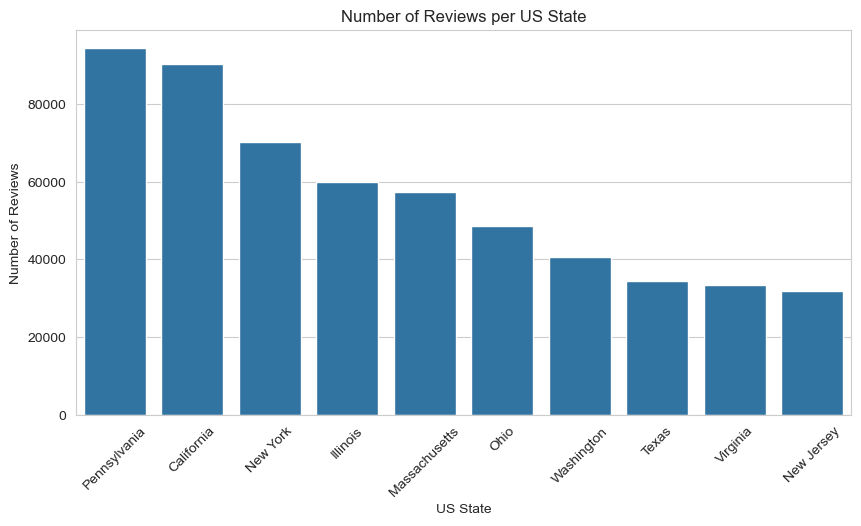

In [6]:
#plot the 10 states with the most reviews (user_US_state)
plt.figure(figsize=(10, 5))
sns.countplot(data=df_us, x='user_US_state', order=df_us['user_US_state'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)
plt.xlabel('US State')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per US State')
plt.show()


top_10_states = df_us['user_US_state'].value_counts().head(10).index.tolist()

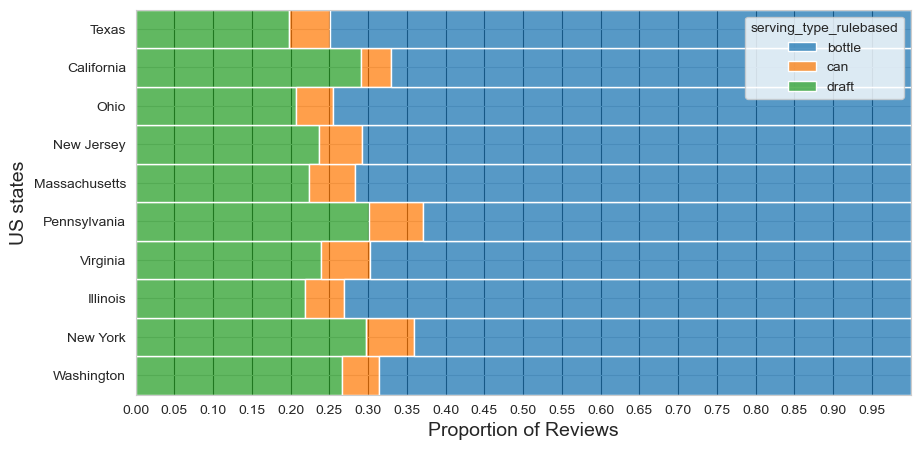

In [9]:
# Show the distribution of serving types among beer groups normalized 
order_type = ['bottle', 'can', 'draft']
top_10_states = df_us['user_US_state'].value_counts().head(10).index.tolist()
plt.figure(figsize=(10, 5))
sns.histplot(data=df_us[df_us['user_US_state'].isin(top_10_states)], y='user_US_state', hue='serving_type_rulebased', multiple='fill', hue_order=order_type)
plt.xlabel('Proportion of Reviews', fontsize=14)
plt.ylabel('US states', fontsize=14)
# add vertical lines
plt.grid(axis='x', linewidth=0.8, color='black')
plt.xticks(np.arange(0, 1, 0.05))
plt.gca().invert_yaxis()
#plt.savefig('figures/serving_type_beer_group_US.png', dpi=300, bbox_inches='tight')
plt.show()

<blockquote>
From this plot, we see that the distribution of serving style is not that different in the US states. Draft have a slightly higher percentage, but it is not significant.
</blockquote>

# Conclusion


> To conclude, the serving style does have an influence on the ratings, but when controling for other covariates such as the beer group, we notice that these differences fade away, and that all serving styles yield almost the same tasting palette ratings. So…it really comes down to personal preferences.  Keep enjoying your beers just the way you like ! 

>To push the analysis further, it would be interesting to get additional data, for example the beer temperature when tasting or the storage conditions.